In [1]:
#Der Stromverbrauch verteilte sich 2023 wie folgt: Industrie: 40,0 %, Private Haushalte: 28,0 %, 
#Kleinverbraucher – hierzu zählen Handel, Gewerbe, Dienstleistungen sowie öffentliche Einrichtungen: 26,7 % und Verkehr: 3,3 %.

#QUELLE : https://www.weltenergierat.de/energie-fuer-deutschland-2024/energie-in-deutschland-zahlen-und-fakten

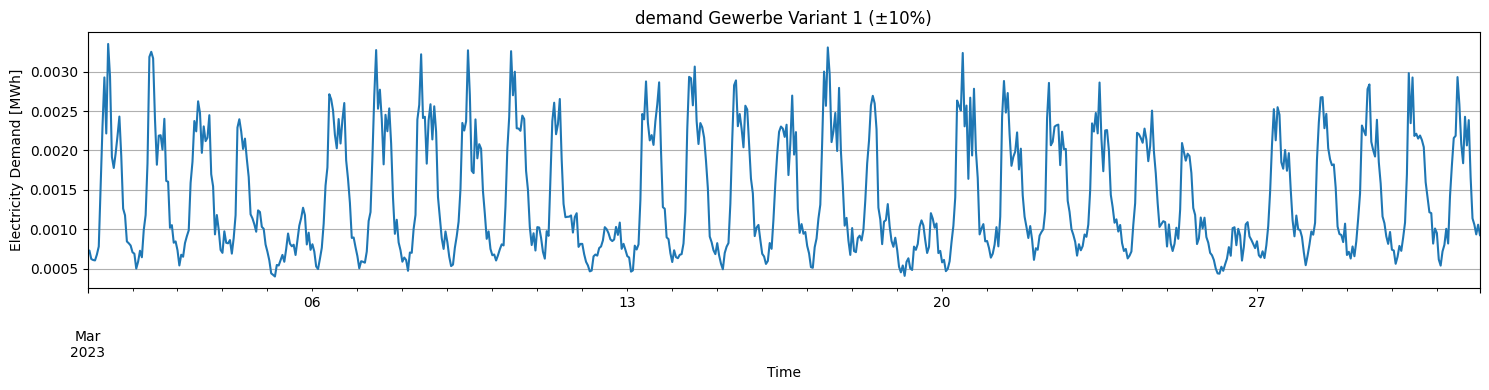

,tot_demand_Gewerbe_variants_[MWh]
2023-03-01 00:00:00,0.008947
2023-03-01 01:00:00,0.007373
2023-03-01 02:00:00,0.006833
2023-03-01 03:00:00,0.007078
2023-03-01 04:00:00,0.008424
...,...
2023-03-31 19:00:00,0.013780
2023-03-31 20:00:00,0.012600
2023-03-31 21:00:00,0.011896
2023-03-31 22:00:00,0.011621


In [2]:
from demandlib.bdew import ElecSlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

e_slp = ElecSlp(year=2023)                     # general business
g0_annual = 12000

profile_g0 = e_slp.get_scaled_profiles({"g0": g0_annual})

demand_Gewerbe = profile_g0["g0"].resample("1h").sum()
demand_Gewerbe = demand_Gewerbe["2023-03-01":"2023-03-31"] / 1000
demand_Gewerbe= demand_Gewerbe.to_frame(name="Demand [MWh]")
#display(demand_Gewerbe.sum())

np.random.seed(42)

#  Generate 12 varied profiles
gewerbe_variants_profiles = []

for i in range(12):
    variation = np.random.uniform(0.8, 1.2, size=len(demand_Gewerbe))
    modified_values = demand_Gewerbe["Demand [MWh]"].values * variation
    
    df_variant = pd.DataFrame(modified_values, index=demand_Gewerbe.index, columns=[f"demand_Gewerbe_{i+1}_[MWh]"])
    
    gewerbe_variants_profiles.append(df_variant)

all_gewerbe_variants = pd.concat(gewerbe_variants_profiles, axis=1)

all_gewerbe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Gewerbe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Gewerbe = all_gewerbe_variants.sum(axis=1).to_frame(name="tot_demand_Gewerbe_variants_[MWh]")
display(tot_Gewerbe)
#all_gewerbe_variants.head(5)

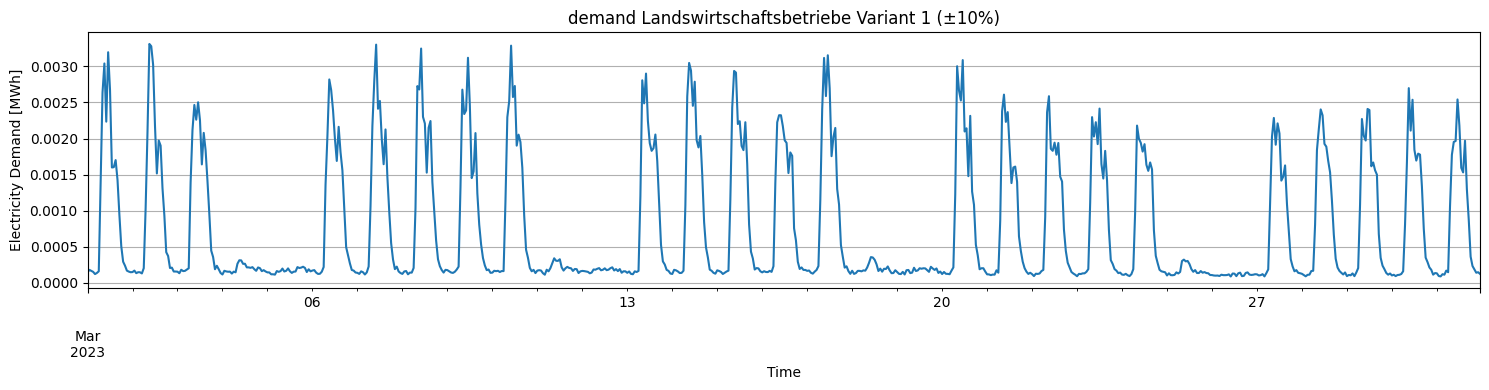

,tot_demand_Landswirtschaftsbetriebe_variants_[MWh]
2023-03-01 00:00:00,0.001588
2023-03-01 01:00:00,0.001561
2023-03-01 02:00:00,0.001568
2023-03-01 03:00:00,0.001444
2023-03-01 04:00:00,0.001425
...,...
2023-03-31 19:00:00,0.002345
2023-03-31 20:00:00,0.001904
2023-03-31 21:00:00,0.001500
2023-03-31 22:00:00,0.001370


In [3]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)            # Business on weekdays 8 a.m. - 6 p.m.
g1_annual = 6000

profile_g1 = e_slp.get_scaled_profiles({"g1": g1_annual})

demand_Landswirtschaftsbetriebe = profile_g1["g1"].resample("1h").sum()
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe["2023-03-01":"2023-03-31"] / 1000
demand_Landswirtschaftsbetriebe = demand_Landswirtschaftsbetriebe.to_frame(name="Demand [MWh]")
#demand_Landswirtschaftsbetriebe


np.random.seed(42)

#  Generate 12 varied profiles
Landswirtschaftsbetriebe_variants_profiles = []

for i in range(10):
    variation2 = np.random.uniform(0.8, 1.2, size=len(demand_Landswirtschaftsbetriebe))
    modified_values2 = demand_Landswirtschaftsbetriebe["Demand [MWh]"].values * variation2
    
    df_variant2 = pd.DataFrame(modified_values2, index=demand_Landswirtschaftsbetriebe.index, columns=[f"demand_Landswirtschaftsbetriebe_{i+1}_[MWh]"])
    
    Landswirtschaftsbetriebe_variants_profiles.append(df_variant2)

all_Landswirtschaftsbetriebe_variants = pd.concat(Landswirtschaftsbetriebe_variants_profiles, axis=1)

all_Landswirtschaftsbetriebe_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Landswirtschaftsbetriebe Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Landswirtschaftsbetriebe = all_Landswirtschaftsbetriebe_variants.sum(axis=1).to_frame(name="tot_demand_Landswirtschaftsbetriebe_variants_[MWh]")
display(tot_Landswirtschaftsbetriebe)
#all_Landswirtschaftsbetriebe_variants.head(5)

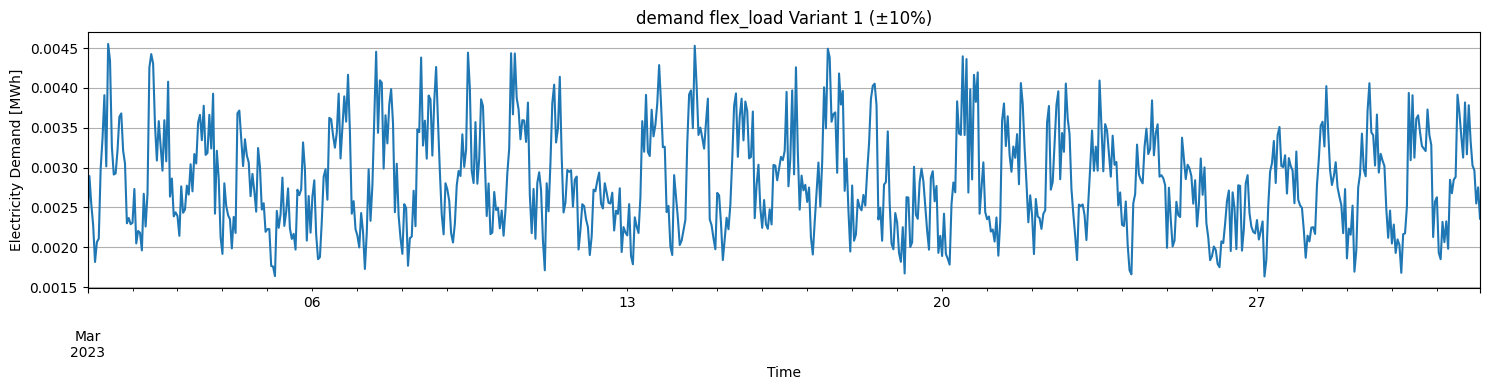

,tot_demand_flex_load_variants_[MWh]
2023-03-01 00:00:00,0.033352
2023-03-01 01:00:00,0.034229
2023-03-01 02:00:00,0.032353
2023-03-01 03:00:00,0.030626
2023-03-01 04:00:00,0.029558
...,...
2023-03-31 19:00:00,0.042981
2023-03-31 20:00:00,0.041250
2023-03-31 21:00:00,0.038039
2023-03-31 22:00:00,0.035602


In [4]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
g3_annual = 25000
profile_g3 = e_slp.get_scaled_profiles({"g3": g3_annual})   #Continuous business

demand_flex_load = profile_g3["g3"].resample("1h").sum()
demand_flex_load = demand_flex_load["2023-03-01":"2023-03-31"] / 1000
demand_flex_load = demand_flex_load.to_frame(name="Demand [MWh]")
#demand_flex_load

np.random.seed(42)

#  Generate 12 varied profiles
flex_load_variants_profiles = []

for i in range(14):
    variation3 = np.random.uniform(0.8, 1.2, size=len(demand_flex_load))
    modified_values3 = demand_flex_load["Demand [MWh]"].values * variation3
    
    df_variant3 = pd.DataFrame(modified_values3, index=demand_flex_load.index, columns=[f"demand_flex_load_{i+1}_[MWh]"])
    
    flex_load_variants_profiles.append(df_variant3)

all_flex_load_variants = pd.concat(flex_load_variants_profiles, axis=1)

all_flex_load_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand flex_load Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_flex_load = all_flex_load_variants.sum(axis=1).to_frame(name="tot_demand_flex_load_variants_[MWh]")
display(tot_flex_load)
#all_flex_load_variants.head(5)

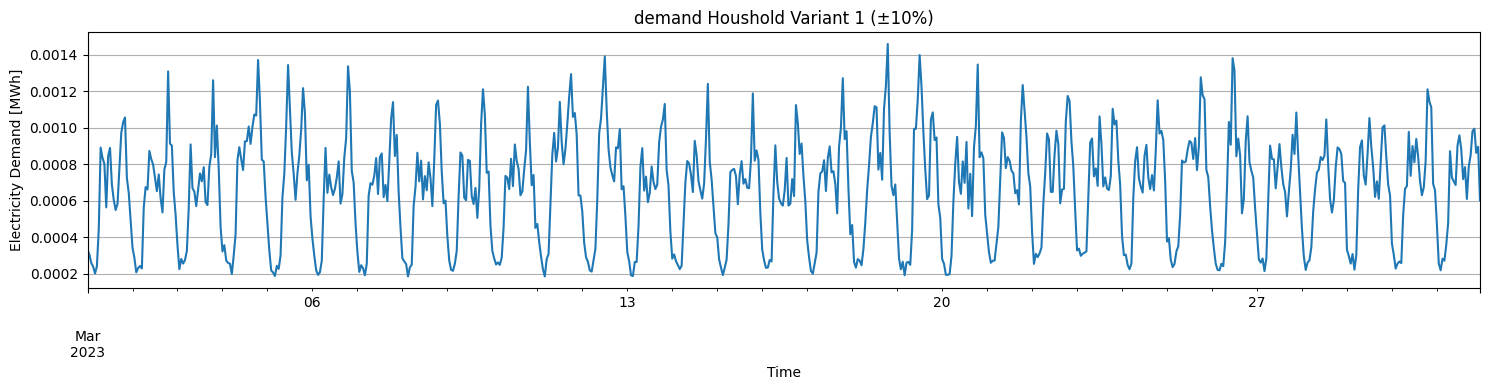

,tot_demand_Houshold_variants_[MWh]
2023-03-01 00:00:00,0.008843
2023-03-01 01:00:00,0.006443
2023-03-01 02:00:00,0.005966
2023-03-01 03:00:00,0.005805
2023-03-01 04:00:00,0.005831
...,...
2023-03-31 19:00:00,0.025631
2023-03-31 20:00:00,0.024456
2023-03-31 21:00:00,0.023249
2023-03-31 22:00:00,0.020712


In [5]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_annual = 6000
# gets 15-min energy values, summing to annual total
profile_h0 = e_slp.get_scaled_profiles({"h0": h0_annual})
# rename and convert by hour
demand_Houshold = profile_h0["h0"].resample("1h").sum()
demand_Houshold = demand_Houshold["2023-03-01":"2023-03-31"] / 1000
demand_Houshold = demand_Houshold.to_frame(name="Demand [MWh]")
#demand_Houshold

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_variants_profiles = []

for i in range(25):
    variation4 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold))
    modified_values4 = demand_Houshold["Demand [MWh]"].values * variation4
    
    df_variant4 = pd.DataFrame(modified_values4, index=demand_Houshold.index, columns=[f"demand_Houshold_{i+1}_[MWh]"])
    
    Houshold_variants_profiles.append(df_variant4)

all_Houshold_variants = pd.concat(Houshold_variants_profiles, axis=1)

all_Houshold_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold = all_Houshold_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_variants_[MWh]")
display(tot_Houshold)
#all_Houshold_variants.head(5)


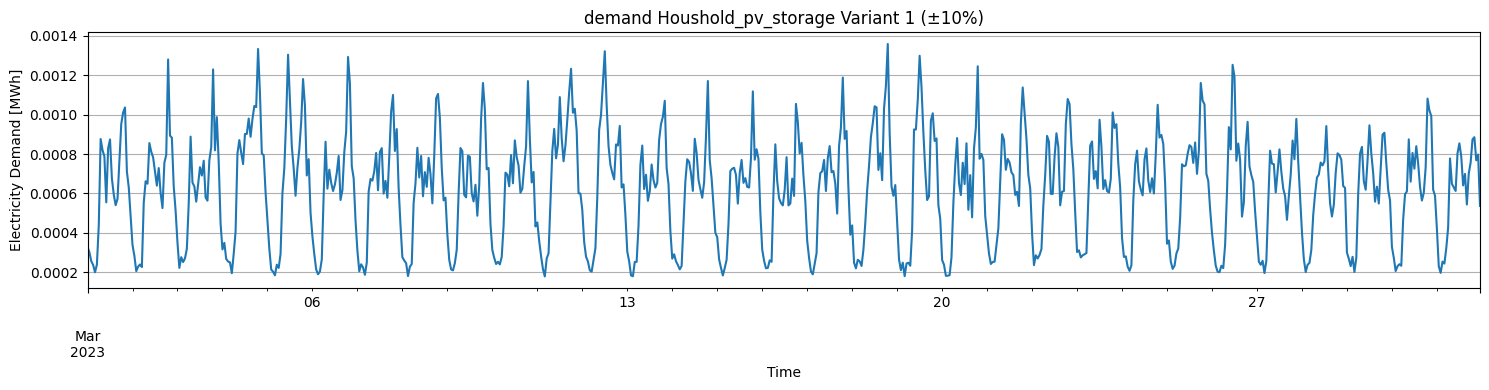

,tot_demand_Houshold_pv_storage_variants_[MWh]
2023-03-01 00:00:00,0.006949
2023-03-01 01:00:00,0.005094
2023-03-01 02:00:00,0.004668
2023-03-01 03:00:00,0.004521
2023-03-01 04:00:00,0.004555
...,...
2023-03-31 19:00:00,0.017808
2023-03-31 20:00:00,0.017515
2023-03-31 21:00:00,0.016515
2023-03-31 22:00:00,0.014665


In [6]:
from demandlib.bdew import ElecSlp
import pandas as pd

e_slp = ElecSlp(year=2023)
h0_dyn_annual = 5000
# gets 15-min energy values, summing to annual total
profile_h0_dyn = e_slp.get_scaled_profiles({"h0_dyn": h0_dyn_annual})
# rename and convert by hour
demand_Houshold_pv_storage = profile_h0_dyn["h0_dyn"].resample("1h").sum()
demand_Houshold_pv_storage = demand_Houshold_pv_storage["2023-03-01":"2023-03-31"] / 1000
demand_Houshold_pv_storage = demand_Houshold_pv_storage.to_frame(name="Demand [MWh]")
#demand_Houshold_pv_storage

np.random.seed(42)

#  Generate 12 varied profiles
Houshold_pv_storage_variants_profiles = []

for i in range(20):
    variation5 = np.random.uniform(0.8, 1.2, size=len(demand_Houshold_pv_storage))
    modified_values5 = demand_Houshold_pv_storage["Demand [MWh]"].values * variation5
    
    df_variant5 = pd.DataFrame(modified_values5, index=demand_Houshold_pv_storage.index, columns=[f"demand_Houshold_pv_storage_{i+1}_[MWh]"])
    
    Houshold_pv_storage_variants_profiles.append(df_variant5)

all_Houshold_pv_storage_variants = pd.concat(Houshold_pv_storage_variants_profiles, axis=1)

all_Houshold_pv_storage_variants.iloc[:, 0].plot(figsize=(15, 4), title="demand Houshold_pv_storage Variant 1 (±10%)")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
tot_Houshold_pv_storage = all_Houshold_pv_storage_variants.sum(axis=1).to_frame(name="tot_demand_Houshold_pv_storage_variants_[MWh]")
display(tot_Houshold_pv_storage)

#all_Houshold_pv_storage_variants.head(5)

# total demands

In [7]:
tot_demand = tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"] + tot_Houshold["tot_demand_Houshold_variants_[MWh]"] + tot_flex_load["tot_demand_flex_load_variants_[MWh]"] + tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"]+ tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"]
tot_demand = tot_demand.to_frame(name="Demand [MWh]")
tot_demand

,Demand [MWh]
2023-03-01 00:00:00,0.059680
2023-03-01 01:00:00,0.054700
2023-03-01 02:00:00,0.051388
2023-03-01 03:00:00,0.049474
2023-03-01 04:00:00,0.049793
...,...
2023-03-31 19:00:00,0.102545
2023-03-31 20:00:00,0.097726
2023-03-31 21:00:00,0.091198
2023-03-31 22:00:00,0.083970


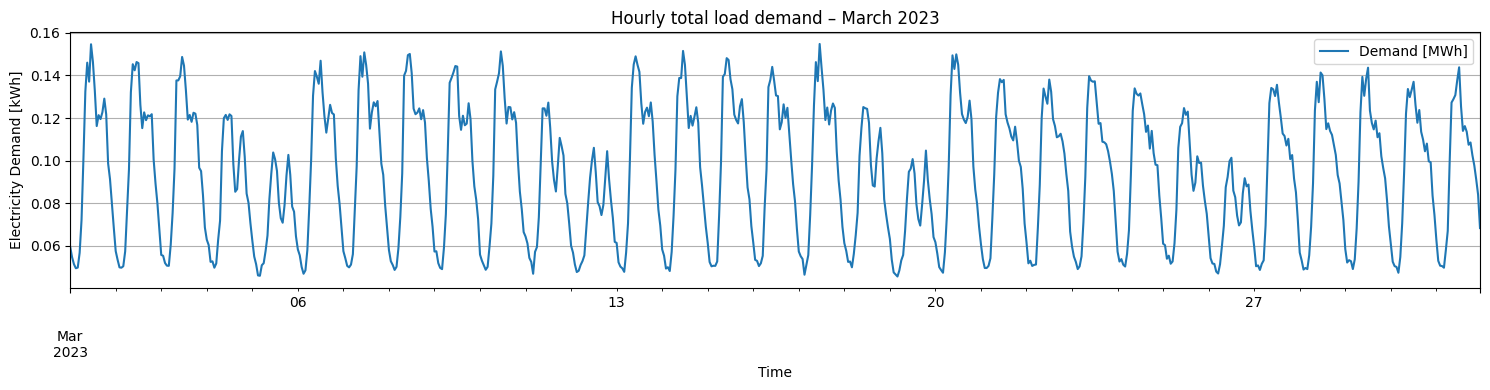

In [8]:
plt.figure(figsize=(15, 4))
tot_demand["Demand [MWh]"].plot(legend=True)
plt.title("Hourly total load demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Electricity Demand [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import pypsa
import pandas as pd

net = pypsa.Network()

net.set_snapshots(pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h"))

# Buses

In [10]:
# Grid bus and generator
net.add("Bus", "grid")
net.add("Bus","solar_bus")
net.add("Bus","demand_Gewerbe")
net.add("Bus","houshold")
net.add("Bus","houshold_pv_storage")
net.add("Bus","Landswirtschaftsbetriebe")
net.add("Bus", "battery_bus")
net.add("Bus","flex_load")
net.add("Bus","Biomass")


Index(['Biomass'], dtype='object')

In [11]:
solar_gen = pd.read_csv("solar_simulated_march_2023.csv", header=None, names=["power[W]"])
solar_gen = solar_gen / 1000000
solar_gen.index = net.snapshots
solar_gen.head(20)


,power[W]
snapshot,
2023-03-01 00:00:00,0.000000
2023-03-01 01:00:00,0.000000
2023-03-01 02:00:00,0.000000
2023-03-01 03:00:00,0.000000
2023-03-01 04:00:00,0.000000
2023-03-01 05:00:00,0.000000
2023-03-01 06:00:00,0.000000
2023-03-01 07:00:00,0.102680
2023-03-01 08:00:00,0.199752


In [12]:
tot_Houshold_pv_storage.index = net.snapshots
tot_Houshold.index = net.snapshots
tot_flex_load.index = net.snapshots
tot_Landswirtschaftsbetriebe.index = net.snapshots
tot_Gewerbe.index = net.snapshots
tot_demand.index = net.snapshots

# Electricity price

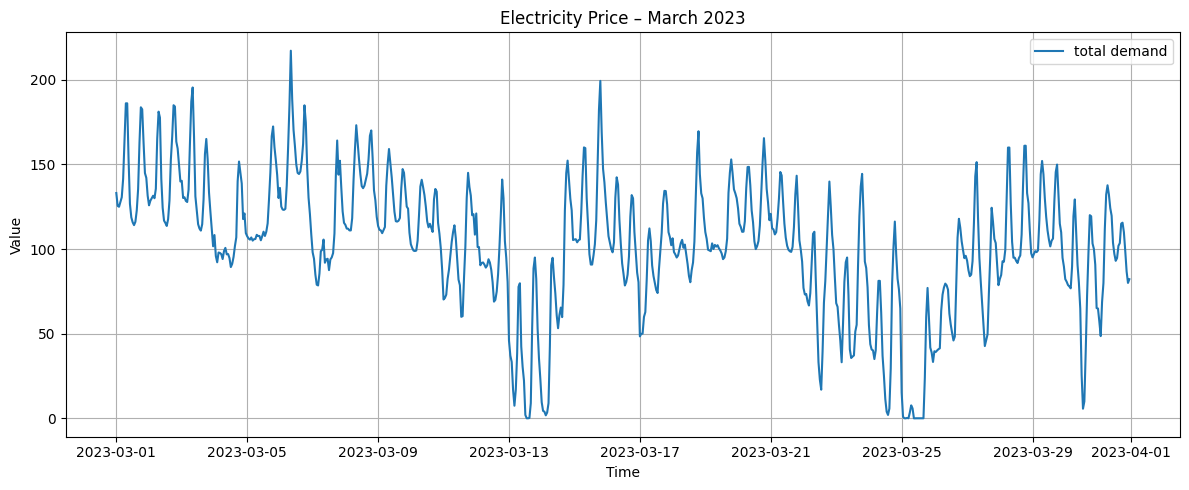

E_price    0.06
dtype: float64

In [13]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1

plt.figure(figsize=(12, 5))
plt.plot(tou_price,  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.min()

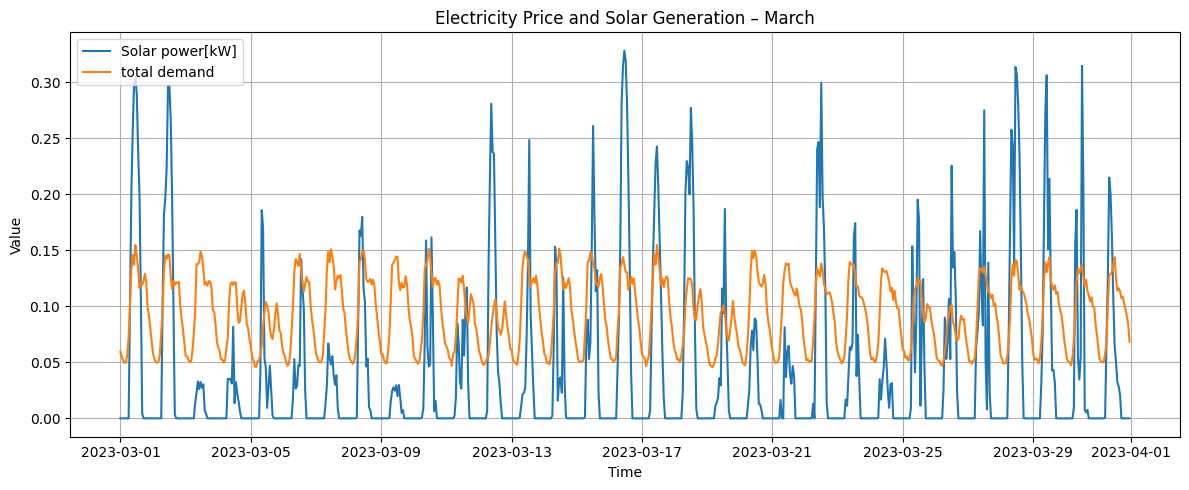

In [14]:
plt.figure(figsize=(12, 5))
plt.plot( solar_gen["power[W]"], label="Solar power[kW]")
plt.plot(tot_demand["Demand [MWh]"],  label="total demand")

plt.title("Electricity Price and Solar Generation – March")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df_diff = tot_demand["Demand [MWh]"]-  solar_gen["power[W]"]
display(df_diff.max())
display(df_diff.min())

0.12912038153346622

-0.2004251148794797

# All generators

In [16]:
net.add("Generator", "grid_generator",
        bus="grid", p_nom=1e6,
        marginal_cost=tou_price["E_price"],
        capital_cost=0)

net.add("Generator", "solar",
        bus="solar_bus",
        p_nom=1,
        p_max_pu= solar_gen["power[W]"],
        marginal_cost= 0.02)   #*tou_price["E_price"])

net.add("Generator", "Biomass",    # source: https://www.drax.com/opinion/the-role-of-biomass-in-securing-reliable-power-generation/#:~:text=globally
         bus="Biomass", p_nom=0.06,   # find a source how much percent should be based load covering
         marginal_cost= 0.05)  #*tou_price["E_price"],  # source : zotero: biomass price


Index(['Biomass'], dtype='object')

# Loads (g0,g1,H0...)

In [17]:
net.add("Load","demand_Gewerbe",
        bus="demand_Gewerbe",
        p_set=tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"])

net.add("Load","demand_houshold",
        bus="houshold",
        p_set=tot_Houshold["tot_demand_Houshold_variants_[MWh]"])

net.add("Load","demand_houshold_pv_storage",
        bus="houshold_pv_storage",
        p_set=tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"])

net.add("Load","demand_Landswirtschaftsbetriebe",
        bus="Landswirtschaftsbetriebe",
        p_set=tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"])

net.add("Load","demand_flex_load",
        bus="flex_load",
        p_set=tot_flex_load["tot_demand_flex_load_variants_[MWh]"])

Index(['demand_flex_load'], dtype='object')

# Battery Energy Storage System(BESS)

In [18]:
net.add("Store", "battery_storage",
        bus="battery_bus",
        e_nom=0.20,           
        e_initial=0,       
        e_cyclic=True)

Index(['battery_storage'], dtype='object')

# Battery for laod shifting(Demand side management)

In [19]:
P = 0.025   # MW  (25 kW)
L = 4       # hours per block
E = P * L   # 0.1 MWh energy budget

net.add(
    "Store", "DSM",
    bus="flex_load",
    e_nom=E,           # total shiftable energy (MWh)
    max_hours=L,       # => power cap p_max = E / L = P (MW)
    e_initial=0.0,
    e_cyclic=False,    # we'll enforce daily neutrality instead
    efficiency_store=1.0,
    efficiency_dispatch=1.0,
    standing_loss=0.0,
    marginal_cost=0.0  # no extra friction; costs come from generators
)


Index(['DSM'], dtype='object')

# Links from GRID to LOADS

In [20]:

net.add("Link", "to_gewerbe",bus0="grid", bus1="demand_Gewerbe",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold",bus0="grid", bus1="houshold",p_nom=10, marginal_cost=200)
net.add("Link", "to_houshold_pv_storage",bus0="grid", bus1="houshold_pv_storage",p_nom=10,marginal_cost=200)
net.add("Link", "to_Landswirtschaftsbetriebe",bus0="grid", bus1="Landswirtschaftsbetriebe",p_nom=10,marginal_cost=200)
net.add("Link", "to_flex_load",bus0="grid", bus1="flex_load",p_nom=10, marginal_cost=200)

Index(['to_flex_load'], dtype='object')

# Links from SOLAR to LOADS

In [21]:

net.add("Link", "solar_to_gewerbe", bus0="solar_bus", bus1="demand_Gewerbe", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_houshold", bus0="solar_bus", bus1="houshold", p_nom=0.4, marginal_cost=100)
net.add("Link", "solar_to_pvhouse", bus0="solar_bus", bus1="houshold_pv_storage", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_landwirtschaft", bus0="solar_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.4,marginal_cost=100)
net.add("Link", "solar_to_flex_load", bus0="solar_bus", bus1="flex_load", p_nom=0.4,marginal_cost=100)

Index(['solar_to_flex_load'], dtype='object')

# Links from BIOMASS to the LOADS

In [22]:
net.add("Link", "Biomass_to_gewerbe", bus0="Biomass", bus1="demand_Gewerbe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_houshold", bus0="Biomass", bus1="houshold", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_pvhouse", bus0="Biomass", bus1="houshold_pv_storage", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_landwirtschaft", bus0="Biomass", bus1="Landswirtschaftsbetriebe", p_nom=0.06,marginal_cost=100)
net.add("Link", "Biomass_to_flex_load", bus0="Biomass", bus1="flex_load", p_nom=0.06,marginal_cost=100)

Index(['Biomass_to_flex_load'], dtype='object')

# Links from Solar to BESS, BESS to the LOADS

In [23]:
net.add("Link", "battery_charge",bus0="solar_bus", bus1="battery_bus", p_nom=0.1, efficiency=1, marginal_cost=0.01, committable=False)

net.add("Link", "BESS_to_gewerbe", bus0="battery_bus", bus1="demand_Gewerbe", p_nom=0.1, marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_houshold", bus0="battery_bus", bus1="houshold", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_pvhouse", bus0="battery_bus", bus1="houshold_pv_storage", p_nom=0.1 , marginal_cost=100.03 , committable=False)
net.add("Link", "BESS_to_landwirtschaft", bus0="battery_bus", bus1="Landswirtschaftsbetriebe", p_nom=0.1 , marginal_cost=100.03, committable=False)
net.add("Link", "BESS_to_flex_load", bus0="battery_bus", bus1="flex_load", p_nom=0.1 , marginal_cost=100.03 , committable=False)

Index(['BESS_to_flex_load'], dtype='object')

In [24]:
#df_EVs = pd.read_csv("charging_plan_generated_by _python.csv", index_col=0, parse_dates=True)
#df_EVs.index = net.snapshots
#df_EVs

# tesla model 3 RWD 2022 : Battery capacity = 62 kwh         14.4 kwh / 100 km
# vw id3 pro :  Battery capacity = 58 kWh         15.6 kwh / 100 km
# vw id7 :  Battery capacity = 77 kW·h       14.1 kwh / 100 km
# BMW i4 M50 :   Bttery capacity =  83.9 kwh   22.5 kwh/ 100 km
# Benz EQE 300 :   Bttery capacity = 89 kwh   16.4 kwh/ 100 km


# EVs buses

In [25]:
charging_profiles = pd.read_csv("charging_profiles.csv", index_col=0, parse_dates=True)
driving_profiles = pd.read_csv("driving_profiles_2.csv", index_col=0, parse_dates=True)
availability_profiles = pd.read_csv("availability_profiles_3.csv", index_col=0, parse_dates=True)
battery_df = pd.read_csv("battery_df.csv", index_col=0)

assert (charging_profiles.index == driving_profiles.index).all()
assert (charging_profiles.index == availability_profiles.index).all()
assert set(charging_profiles.columns) <= set(battery_df.index)


net.set_snapshots(charging_profiles.index)

#net.links_t.p_max_pu = pd.DataFrame(index=charging_profiles.index)
net.links_t.p_max_pu = pd.DataFrame(1.0, index=charging_profiles.index, columns=[])

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    
    ev_bus = f"{ev_id}_bus"
    link_name = f"{ev_id}_charge"
    Link_name = f"{ev_id}_Charge"
    LInk_name = f"{ev_id}_CHarge"
    load_name = f"{ev_id}_load"
    store_name = f"{ev_id}_store"

    availability = availability_profiles[ev_name]

    

    net.add("Bus", ev_bus)

    net.add("Store", store_name,
            bus=ev_bus,
            e_nom = battery_df.loc[ev_name, "e_nom_MWh"],
            e_initial = battery_df.loc[ev_name, "e_initial_MWh"],
            e_cyclic=False,
            marginal_cost=0)

    net.add("Link", link_name,
            bus0="grid",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=200,
            committable=False)
    
    net.add("Link", Link_name,
            bus0="solar_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Link", LInk_name,
            bus0="battery_bus",   
            bus1=ev_bus,   
            p_nom=0.011,      
            marginal_cost=100,
            committable=False)

    net.add("Load", load_name,
            bus=ev_bus,
            p_set=driving_profiles[ev_name])
    
    net.links_t.p_max_pu[Link_name] = availability
    net.links_t.p_max_pu[link_name] = availability
    net.links_t.p_max_pu[LInk_name] = availability


In [26]:

'''ev_power = 13 / 1000
initial_energy = 25 / 1000
roundtrip_eff = 0.95



for i in range(20):
    ev_name = f"EV{i+1}"                                                                                                           
    ev_bus = f"ev{i+1}_bus"
    
    profile_index = (i % 5) + 1
    consumption_col = f"power_consumption{profile_index}_kW"
    availability_col = f"availability{profile_index}"
    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"

    consumption_series = df_EVs[consumption_col]
    availability_series = df_EVs[availability_col]
    Battery_capacity_series = df_EVs[Battery_capacity_col]

    net.add("Bus", ev_bus)
    battery_capacity = Battery_capacity_series.iloc[0] / 1000
    net.add("Store", f"{ev_name}_store",
            bus=ev_bus,
            e_nom= battery_capacity,
            e_initial=initial_energy,
            marginal_cost=0,
            e_cyclic=False)

    net.add("Link", f"{ev_name}_charge",
            bus0="grid", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_Charge",
            bus0="solar_bus", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)

    net.add("Link", f"{ev_name}_CHarge",
            bus0="Biomass", bus1=ev_bus,
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=0,
            committable=True)
    
    net.add("Link", f"{ev_name}_discharge",
            bus0=ev_bus, bus1="grid",
            p_nom=ev_power,
            efficiency=roundtrip_eff,
            p_max_pu=availability_series,
            marginal_cost=-0.12*tou_price["E_price"],  #-132 should be based on a Paper
            committable=True)

    net.add("Load", f"{ev_name}_load",
            bus=ev_bus,
            p_set=consumption_series/1000)'''


'ev_power = 13 / 1000\ninitial_energy = 25 / 1000\nroundtrip_eff = 0.95\n\n\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"                                                                                                           \n    ev_bus = f"ev{i+1}_bus"\n    \n    profile_index = (i % 5) + 1\n    consumption_col = f"power_consumption{profile_index}_kW"\n    availability_col = f"availability{profile_index}"\n    Battery_capacity_col = f"Battery_capacity{profile_index}_kwh"\n\n    consumption_series = df_EVs[consumption_col]\n    availability_series = df_EVs[availability_col]\n    Battery_capacity_series = df_EVs[Battery_capacity_col]\n\n    net.add("Bus", ev_bus)\n    battery_capacity = Battery_capacity_series.iloc[0] / 1000\n    net.add("Store", f"{ev_name}_store",\n            bus=ev_bus,\n            e_nom= battery_capacity,\n            e_initial=initial_energy,\n            marginal_cost=0,\n            e_cyclic=False)\n\n    net.add("Link", f"{ev_name}_charge",\n           

# Create the model and add custom constraint to prevent simultanous charging and discharging

In [27]:


'''link_dim = model.variables["Link-status"].dims[1]
store_dim = model.variables["Store-e"].dims[1]


for i in range(15):
    ev_name = f"EV{i+1}"
    profile_index = (i % 5) + 1
    availability_col = f"availability{profile_index}"
    availability = df_EVs[availability_col]  

    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})
    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")

for i in range(20):
    ev_name = f"EV{i+1}"
    profile_index2 = (i % 5) + 1
    availability_col2 = f"availability{profile_index2}"
    availability2 = df_EVs[availability_col2]  

    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})
    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})
    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})
    model.add_constraints(ch_grid + ch_solar + ch_biomass <= availability2, name=f"{ev_name}_xor")'''
    

'link_dim = model.variables["Link-status"].dims[1]\nstore_dim = model.variables["Store-e"].dims[1]\n\n\nfor i in range(15):\n    ev_name = f"EV{i+1}"\n    profile_index = (i % 5) + 1\n    availability_col = f"availability{profile_index}"\n    availability = df_EVs[availability_col]  \n\n    sc = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    sd = model.variables["Link-status"].sel({link_dim: f"{ev_name}_discharge"})\n    model.add_constraints(sc + sd <= availability, name=f"{ev_name}_xor")\n\nfor i in range(20):\n    ev_name = f"EV{i+1}"\n    profile_index2 = (i % 5) + 1\n    availability_col2 = f"availability{profile_index2}"\n    availability2 = df_EVs[availability_col2]  \n\n    ch_grid = model.variables["Link-status"].sel({link_dim: f"{ev_name}_charge"})\n    ch_solar = model.variables["Link-status"].sel({link_dim: f"{ev_name}_Charge"})\n    ch_biomass = model.variables["Link-status"].sel({link_dim: f"{ev_name}_CHarge"})\n    model.add_constraints(ch_grid 

# add costum constraint to keep the SOCs always between 20% and 80%

In [28]:
model = net.optimize.create_model()

store_dim = model.variables["Store-e"].dims[1]
link_dim = model.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model.variables["Store-e"].sel({store_dim: store_id})
    model.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

#########################################################################

p_nom = 0.011
P_nom = 0.1

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"

    p_grid = model.variables["Link-p"].sel({link_dim: link_grid})
    p_solar = model.variables["Link-p"].sel({link_dim: link_solar})
    p_batt = model.variables["Link-p"].sel({link_dim: link_battery})

    model.add_constraints(
        p_grid + p_solar + p_batt <= p_nom,
        name=f"{ev_id}_one_source_at_a_time",
    )    

    link_dim = model.variables["Link-p"].dims[1]
    link_BESS_to_gewerbe = "BESS_to_gewerbe"
    link_BESS_to_houshold = "BESS_to_houshold" 
    link_BESS_to_pvhouse = "BESS_to_pvhouse"
    link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
    link_BESS_to_flex_load = "BESS_to_flex_load"

    p_BESStoGewerbe = model.variables["Link-p"].sel({link_dim: link_BESS_to_gewerbe})
    p_BESStoHaushold = model.variables["Link-p"].sel({link_dim: link_BESS_to_houshold })
    p_BESStoPvhouse = model.variables["Link-p"].sel({link_dim: link_BESS_to_pvhouse})
    p_BESStoLandwirtschaft = model.variables["Link-p"].sel({link_dim: link_BESS_to_landwirtschaft})
    p_BESStoFlexload = model.variables["Link-p"].sel({link_dim: link_BESS_to_flex_load})

    
    model.add_constraints(
        p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse
        + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt <= P_nom,
        name=f"{ev_id}_bess_dispatch_cap"
    )
############################################################################
store_dim = model.variables["Store-e"].dims[1]

Battery_capacity = net.stores.at["battery_storage", "e_nom"]

soc_batt = model.variables["Store-e"].sel({store_dim: "battery_storage"})

SoC_min = 0.2 * Battery_capacity
SoC_max = 0.8 * Battery_capacity

model.add_constraints(soc_batt >= SoC_min, name="battery_storage_soc_min")
model.add_constraints(soc_batt <= SoC_max, name="battery_storage_soc_max")
############################################################################

snap_dim = model.variables["Store-p"].dims[0]   # usually "snapshot"
store_dim = model.variables["Store-p"].dims[1]  # usually "store"

p = model.variables["Store-p"].sel({store_dim: "DSM"})  # MW (+ discharge reduces net demand)
e = model.variables["Store-e"].sel({store_dim: "DSM"})  # MWh

T = list(net.snapshots)

# Use a dict or a (name, values) tuple so the dim name is preserved
# after snap_dim is defined, e.g. snap_dim = model.variables["Store-p"].dims[0]
y_pos = model.add_variables(binary=True, coords=[(snap_dim, net.snapshots)], name="dsm_pos_start")
y_neg = model.add_variables(binary=True, coords=[(snap_dim, net.snapshots)], name="dsm_neg_start")



# Helper: group snapshots by day
days = pd.to_datetime(net.snapshots).normalize().unique()
by_day = {d: [t for t in T if t.normalize() == d] for d in days}

# Forbid starts in the last L-1 hours of each day (to keep 4h blocks within the day)
for d, hours in by_day.items():
    forbid = hours[-(L-1):]  # e.g., 21,22,23 for L=4
    for t in forbid:
        model.add_constraints(y_pos.sel({snap_dim: t}) == 0, name=f"pos_forbid_{t}")
        model.add_constraints(y_neg.sel({snap_dim: t}) == 0, name=f"neg_forbid_{t}")

# Active-block logic via running sum of starts over the last L hours
for i, t in enumerate(T):
    # running window (won't cross midnight because of the "forbid" above)
    k0 = max(0, i - (L - 1))
    ks = T[k0:i+1]
    active_pos = y_pos.sel({snap_dim: ks}).sum(snap_dim)
    active_neg = y_neg.sel({snap_dim: ks}).sum(snap_dim)

    # No simultaneous + and - in the same hour
    model.add_constraints(active_pos + active_neg <= 1, name=f"no_overlap_{t}")

    # Exact power when active: +P for pos block, -P for neg block; 0 otherwise
    model.add_constraints(p.sel({snap_dim: t}) == P*active_pos - P*active_neg,
                      name=f"exact_power_{t}")

# Prevent overlapping starts of the same type within any 4h window
for i, t in enumerate(T):
    k0 = max(0, i - (L - 1))
    ks = T[k0:i+1]
    model.add_constraints(y_pos.sel({snap_dim: ks}).sum(snap_dim) <= 1, name=f"pos_nonoverlap_{t}")
    model.add_constraints(y_neg.sel({snap_dim: ks}).sum(snap_dim) <= 1, name=f"neg_nonoverlap_{t}")

# Exactly one + block and one - block per day (daily cardinality)
for d, hours in by_day.items():
    # valid start hours for that day (exclude last L-1 already forced to 0)
    valid_starts = hours[:- (L-1)] if L > 1 else hours
    if len(valid_starts) > 0:
        model.add_constraints(y_pos.sel({snap_dim: valid_starts}).sum(snap_dim) == 1,
                          name=f"pos_one_block_{d.date()}")
        model.add_constraints(y_neg.sel({snap_dim: valid_starts}).sum(snap_dim) == 1,
                          name=f"neg_one_block_{d.date()}")

# Daily neutrality: SoC at 00:00 equals SoC at 23:00 (per day)
for d, hours in by_day.items():
    start = hours[0]           # 00:00
    end   = hours[-1]          # 23:00
    model.add_constraints(e.sel({snap_dim: start}) == e.sel({snap_dim: end}),
                      name=f"daily_neutral_{d.date()}")


############################################################################
net.optimize.solve_model(
    solver_name="gurobi",
    solver_options={
        "TimeLimit": 600,     # in seconds = 10 minutes
        #"MIPGap": 0.005        # stop when within 1% of best known solution
    }
)
net.optimize.assign_solution()

dsm_fixed = net.stores_t.p["DSM"].copy()

Index(['battery_storage', 'DSM', 'tesla_model_3_1_store',
       'tesla_model_3_2_store', 'tesla_model_3_3_store',
       'tesla_model_3_4_store', 'vw_id3_pro_1_store', 'vw_id3_pro_2_store',
       'vw_id3_pro_3_store', 'vw_id3_pro_4_store', 'vw_id7_1_store',
       'vw_id7_2_store', 'vw_id7_3_store', 'vw_id7_4_store',
       'bmw_i4_m50_1_store', 'bmw_i4_m50_2_store', 'bmw_i4_m50_3_store',
       'bmw_i4_m50_4_store', 'benz_eqe_300_1_store', 'benz_eqe_300_2_store',
       'benz_eqe_300_3_store', 'benz_eqe_300_4_store'],
      dtype='object', name='Store')
Index(['to_gewerbe', 'to_houshold', 'to_houshold_pv_storage',
       'to_Landswirtschaftsbetriebe', 'to_flex_load', 'solar_to_gewerbe',
       'solar_to_houshold', 'solar_to_pvhouse', 'solar_to_landwirtschaft',
       'solar_to_flex_load', 'Biomass_to_gewerbe', 'Biomass_to_houshold',
       'Biomass_to_pvhouse', 'Biomass_to_landwirtschaft',
       'Biomass_to_flex_load', 'battery_charge', 'BESS_to_gewerbe',
       'BESS_to_houshold',

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-jvwvc3mt.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-jvwvc3mt.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 259935 rows, 96720 columns, 531221 nonzeros


INFO:gurobipy:obj: 259935 rows, 96720 columns, 531221 nonzeros


Set parameter TimeLimit to value 600


INFO:gurobipy:Set parameter TimeLimit to value 600


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


TimeLimit  600


INFO:gurobipy:TimeLimit  600


INFO:gurobipy:


Optimize a model with 259935 rows, 96720 columns and 531221 nonzeros


INFO:gurobipy:Optimize a model with 259935 rows, 96720 columns and 531221 nonzeros


Model fingerprint: 0x62ffef92


INFO:gurobipy:Model fingerprint: 0x62ffef92


Variable types: 95232 continuous, 1488 integer (1488 binary)


INFO:gurobipy:Variable types: 95232 continuous, 1488 integer (1488 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [3e-02, 1e+00]


INFO:gurobipy:  Matrix range     [3e-02, 1e+00]


  Objective range  [1e-02, 2e+02]


INFO:gurobipy:  Objective range  [1e-02, 2e+02]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 222019 rows and 61076 columns


INFO:gurobipy:Presolve removed 222019 rows and 61076 columns


Presolve time: 0.13s


INFO:gurobipy:Presolve time: 0.13s


Presolved: 37916 rows, 35644 columns, 167651 nonzeros


INFO:gurobipy:Presolved: 37916 rows, 35644 columns, 167651 nonzeros


Variable types: 34342 continuous, 1302 integer (1302 binary)


INFO:gurobipy:Variable types: 34342 continuous, 1302 integer (1302 binary)


Performing another presolve...


INFO:gurobipy:Performing another presolve...


Presolve removed 21552 rows and 10231 columns


INFO:gurobipy:Presolve removed 21552 rows and 10231 columns


Presolve time: 0.34s


INFO:gurobipy:Presolve time: 0.34s


INFO:gurobipy:


Root relaxation: objective 8.728201e+03, 8712 iterations, 0.16 seconds (0.15 work units)


INFO:gurobipy:Root relaxation: objective 8.728201e+03, 8712 iterations, 0.16 seconds (0.15 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0 8728.20104    0  131          - 8728.20104      -     -    0s


INFO:gurobipy:     0     0 8728.20104    0  131          - 8728.20104      -     -    0s


H    0     0                    8825.3200396 8728.20104  1.10%     -    0s


INFO:gurobipy:H    0     0                    8825.3200396 8728.20104  1.10%     -    0s


H    0     0                    8756.1626434 8728.20104  0.32%     -    1s


INFO:gurobipy:H    0     0                    8756.1626434 8728.20104  0.32%     -    1s


H    0     0                    8744.0108579 8728.20104  0.18%     -    1s


INFO:gurobipy:H    0     0                    8744.0108579 8728.20104  0.18%     -    1s


H    0     0                    8733.2161685 8728.20104  0.06%     -    1s


INFO:gurobipy:H    0     0                    8733.2161685 8728.20104  0.06%     -    1s


     0     0 8730.12263    0  119 8733.21617 8730.12263  0.04%     -    1s


INFO:gurobipy:     0     0 8730.12263    0  119 8733.21617 8730.12263  0.04%     -    1s


H    0     0                    8731.8115686 8730.12263  0.02%     -    1s


INFO:gurobipy:H    0     0                    8731.8115686 8730.12263  0.02%     -    1s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  Gomory: 3


INFO:gurobipy:  Gomory: 3


  MIR: 8


INFO:gurobipy:  MIR: 8


INFO:gurobipy:


Explored 1 nodes (8797 simplex iterations) in 1.49 seconds (0.99 work units)


INFO:gurobipy:Explored 1 nodes (8797 simplex iterations) in 1.49 seconds (0.99 work units)


Thread count was 12 (of 12 available processors)


INFO:gurobipy:Thread count was 12 (of 12 available processors)


INFO:gurobipy:


Solution count 5: 8731.81 8733.22 8744.01 ... 8825.32


INFO:gurobipy:Solution count 5: 8731.81 8733.22 8744.01 ... 8825.32


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 8.731811568641e+03, best bound 8.730990538892e+03, gap 0.0094%


INFO:gurobipy:Best objective 8.731811568641e+03, best bound 8.730990538892e+03, gap 0.0094%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 96720 primals, 0 duals
Objective: 8.73e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


In [29]:
#Stage 2 for obtaining the LMP in LP(turning the model to LP to retrieve the LMPs)

model2 = net.optimize.create_model()

store_dim2 = model2.variables["Store-e"].dims[1]
link_dim2  = model2.variables["Link-p"].dims[1]

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
    store_id = f"{ev_id}_store"

    battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
    soc_min = 0.2 * battery_capacity
    soc_max = 0.8 * battery_capacity

    soc = model2.variables["Store-e"].sel({store_dim2: store_id})
    model2.add_constraints(soc >= soc_min, name=f"{ev_id}_soc_min")
    model2.add_constraints(soc <= soc_max, name=f"{ev_id}_soc_max")

p_nom = 0.011
P_nom = 0.1

for ev_name in charging_profiles.columns:
    ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")

    link_grid = f"{ev_id}_charge"
    link_solar = f"{ev_id}_Charge"
    link_battery = f"{ev_id}_CHarge"

    p_grid = model2.variables["Link-p"].sel({link_dim2: link_grid})
    p_solar = model2.variables["Link-p"].sel({link_dim2: link_solar})
    p_batt = model2.variables["Link-p"].sel({link_dim2: link_battery})

    model2.add_constraints(
        p_grid + p_solar + p_batt <= p_nom,
        name=f"{ev_id}_one_source_at_a_time",
    )

    link_dim2 = model2.variables["Link-p"].dims[1]
    link_BESS_to_gewerbe = "BESS_to_gewerbe"
    link_BESS_to_houshold = "BESS_to_houshold" 
    link_BESS_to_pvhouse = "BESS_to_pvhouse"
    link_BESS_to_landwirtschaft = "BESS_to_landwirtschaft"
    link_BESS_to_flex_load = "BESS_to_flex_load"

    p_BESStoGewerbe = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_gewerbe})
    p_BESStoHaushold = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_houshold })
    p_BESStoPvhouse = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_pvhouse})
    p_BESStoLandwirtschaft = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_landwirtschaft})
    p_BESStoFlexload = model2.variables["Link-p"].sel({link_dim2: link_BESS_to_flex_load})

    model2.add_constraints(
        p_BESStoGewerbe + p_BESStoHaushold + p_BESStoPvhouse
        + p_BESStoLandwirtschaft + p_BESStoFlexload + p_batt <= P_nom,
        name=f"{ev_id}_bess_dispatch_cap"
    )

store_dim2 = model2.variables["Store-e"].dims[1]
Battery_capacity = net.stores.at["battery_storage", "e_nom"]

soc_batt = model2.variables["Store-e"].sel({store_dim2: "battery_storage"})
SoC_min = 0.2 * Battery_capacity
SoC_max = 0.8 * Battery_capacity

model2.add_constraints(soc_batt >= SoC_min, name="battery_storage_soc_min")
model2.add_constraints(soc_batt <= SoC_max, name="battery_storage_soc_max")

snap_dim2 = model2.variables["Store-p"].dims[0]
store_dim2p = model2.variables["Store-p"].dims[1]
p2 = model2.variables["Store-p"].sel({store_dim2p: "DSM"})

p_fixed_da = xr.DataArray(dsm_fixed.values, coords=[(snap_dim2, net.snapshots)], name="DSM_fixed_power")
model2.add_constraints(p2 == p_fixed_da, name="fix_dsm_power")


net.optimize.solve_model(solver_name="gurobi")  
net.optimize.assign_solution()



Index(['battery_storage', 'DSM', 'tesla_model_3_1_store',
       'tesla_model_3_2_store', 'tesla_model_3_3_store',
       'tesla_model_3_4_store', 'vw_id3_pro_1_store', 'vw_id3_pro_2_store',
       'vw_id3_pro_3_store', 'vw_id3_pro_4_store', 'vw_id7_1_store',
       'vw_id7_2_store', 'vw_id7_3_store', 'vw_id7_4_store',
       'bmw_i4_m50_1_store', 'bmw_i4_m50_2_store', 'bmw_i4_m50_3_store',
       'bmw_i4_m50_4_store', 'benz_eqe_300_1_store', 'benz_eqe_300_2_store',
       'benz_eqe_300_3_store', 'benz_eqe_300_4_store'],
      dtype='object', name='Store')
Index(['to_gewerbe', 'to_houshold', 'to_houshold_pv_storage',
       'to_Landswirtschaftsbetriebe', 'to_flex_load', 'solar_to_gewerbe',
       'solar_to_houshold', 'solar_to_pvhouse', 'solar_to_landwirtschaft',
       'solar_to_flex_load', 'Biomass_to_gewerbe', 'Biomass_to_houshold',
       'Biomass_to_pvhouse', 'Biomass_to_landwirtschaft',
       'Biomass_to_flex_load', 'battery_charge', 'BESS_to_gewerbe',
       'BESS_to_houshold',

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2676468


INFO:gurobipy:Set parameter LicenseID to value 2676468


Academic license - for non-commercial use only - expires 2026-06-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-06-09


Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-8mhfxfkb.lp


INFO:gurobipy:Read LP format model from file C:\Users\modi\AppData\Local\Temp\linopy-problem-8mhfxfkb.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 257424 rows, 95232 columns, 511851 nonzeros


INFO:gurobipy:obj: 257424 rows, 95232 columns, 511851 nonzeros


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 5625U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 257424 rows, 95232 columns and 511851 nonzeros


INFO:gurobipy:Optimize a model with 257424 rows, 95232 columns and 511851 nonzeros


Model fingerprint: 0x68985b72


INFO:gurobipy:Model fingerprint: 0x68985b72


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [1e-02, 2e+02]


INFO:gurobipy:  Objective range  [1e-02, 2e+02]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-04, 1e+06]


INFO:gurobipy:  RHS range        [1e-04, 1e+06]


Presolve removed 242951 rows and 67199 columns


INFO:gurobipy:Presolve removed 242951 rows and 67199 columns


Presolve time: 0.22s


INFO:gurobipy:Presolve time: 0.22s


Presolved: 14473 rows, 28033 columns, 79403 nonzeros


INFO:gurobipy:Presolved: 14473 rows, 28033 columns, 79403 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 7.892e+04


INFO:gurobipy: AA' NZ     : 7.892e+04


 Factor NZ  : 2.568e+05 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 2.568e+05 (roughly 20 MB of memory)


 Factor Ops : 6.297e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.297e+06 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.33855277e+05 -5.01743588e+04  1.35e+01 2.84e-14  1.68e+01     0s


INFO:gurobipy:   0   4.33855277e+05 -5.01743588e+04  1.35e+01 2.84e-14  1.68e+01     0s


   1   5.10698420e+04 -3.80091828e+04  1.27e+00 2.07e+00  1.98e+00     0s


INFO:gurobipy:   1   5.10698420e+04 -3.80091828e+04  1.27e+00 2.07e+00  1.98e+00     0s


   2   1.53117142e+04 -2.04706620e+03  1.53e-01 1.21e-02  2.97e-01     0s


INFO:gurobipy:   2   1.53117142e+04 -2.04706620e+03  1.53e-01 1.21e-02  2.97e-01     0s


   3   1.00842817e+04  6.62443900e+03  2.33e-02 4.55e-13  5.25e-02     0s


INFO:gurobipy:   3   1.00842817e+04  6.62443900e+03  2.33e-02 4.55e-13  5.25e-02     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.34 seconds (0.26 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.34 seconds (0.26 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    8753    8.7318116e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    8753    8.7318116e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 8753 iterations and 0.47 seconds (0.36 work units)


INFO:gurobipy:Solved in 8753 iterations and 0.47 seconds (0.36 work units)


Optimal objective  8.731811569e+03


INFO:gurobipy:Optimal objective  8.731811569e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 95232 primals, 257424 duals
Objective: 8.73e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance, tesla_model_3_1_soc_min, tesla_model_3_1_soc_max, tesla_model_3_2_soc_min, tesla_model_3_2_soc_max, tesla_model_3_3_soc_min, tesla_model_3_3_soc_max, tesla_model_3_4_soc_min, tesla_model_3_4_soc_max, vw_id3_pro_1_soc_min, vw_id3_pro_1_soc_max, vw_id3_pro_2_soc_min, vw_id3_pro_2_soc_max, vw_id3_pro_3_soc_min, vw_id3_pro_3_soc_max, vw_id3_pro_4_soc_min, vw_id3_pro_4_soc_max, vw_id7_1_soc_min, vw_id7_1_soc_max, vw_id7_2_soc_min, vw_id7_2_soc_max, vw_id7_3_soc_min, vw_id7_3_soc_max, vw_id7_4_soc_min, vw_id7_4_soc_max, bmw_i4_m50_1_soc_min, bmw_i

In [30]:
dsm_p = net.stores_t.p["DSM"]  # +0.025 MW for 4h and -0.025 MW for 4h each day
dsm_e = net.stores_t.e["DSM"]

print("DSM power, first day:\n", dsm_p.loc["2023-03-08"].head(24))
print("Check daily energy neutrality (SoC start/end):")
for d in days[:3]:
    print(d.date(), float(dsm_e.loc[d + pd.Timedelta(hours=0)]),
                   float(dsm_e.loc[d + pd.Timedelta(hours=23)]))

DSM power, first day:
 snapshot
2023-03-08 00:00:00    0.000
2023-03-08 01:00:00    0.000
2023-03-08 02:00:00    0.000
2023-03-08 03:00:00    0.000
2023-03-08 04:00:00    0.000
2023-03-08 05:00:00    0.000
2023-03-08 06:00:00    0.000
2023-03-08 07:00:00   -0.025
2023-03-08 08:00:00   -0.025
2023-03-08 09:00:00   -0.025
2023-03-08 10:00:00   -0.025
2023-03-08 11:00:00    0.000
2023-03-08 12:00:00    0.000
2023-03-08 13:00:00    0.000
2023-03-08 14:00:00    0.000
2023-03-08 15:00:00    0.000
2023-03-08 16:00:00    0.000
2023-03-08 17:00:00    0.025
2023-03-08 18:00:00    0.025
2023-03-08 19:00:00    0.025
2023-03-08 20:00:00    0.025
2023-03-08 21:00:00    0.000
2023-03-08 22:00:00    0.000
2023-03-08 23:00:00    0.000
Name: DSM, dtype: float64
Check daily energy neutrality (SoC start/end):
2023-03-01 0.0 0.0
2023-03-02 0.0 0.0
2023-03-03 0.0 0.0


In [31]:
dsm_fixed = net.stores_t.p["DSM"]
#dsm_fixed

In [32]:
charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_charge" 
                  for col in charging_profiles.columns]

Charging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_Charge" 
                  for col in charging_profiles.columns]

CHarging_links = [f"{col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}_CHarge" 
                  for col in charging_profiles.columns]

#Charging_links = [f"EV{i+1}_Charge" for i in range(20)]
#CHarging_links = [f"EV{i+1}_CHarge" for i in range(20)]

charging_df = net.links_t.p0[charging_links].copy()
charging_df["total_charging"] = charging_df.sum(axis=1)

Charging_df = net.links_t.p0[Charging_links].copy()
Charging_df["total_Charging"] = Charging_df.sum(axis=1)

CHarging_df = net.links_t.p0[CHarging_links].copy()
CHarging_df["total_CHarging"] = CHarging_df.sum(axis=1)

Tot_EVs_charging = charging_df["total_charging"]+ Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_EVs_charging = Tot_EVs_charging.to_frame(name="EVs demand [MWh]")

Tot_demand = tot_demand["Demand [MWh]"] + charging_df["total_charging"] + Charging_df["total_Charging"] + CHarging_df["total_CHarging"]
Tot_demand.sum()

np.float64(73.36999144376992)

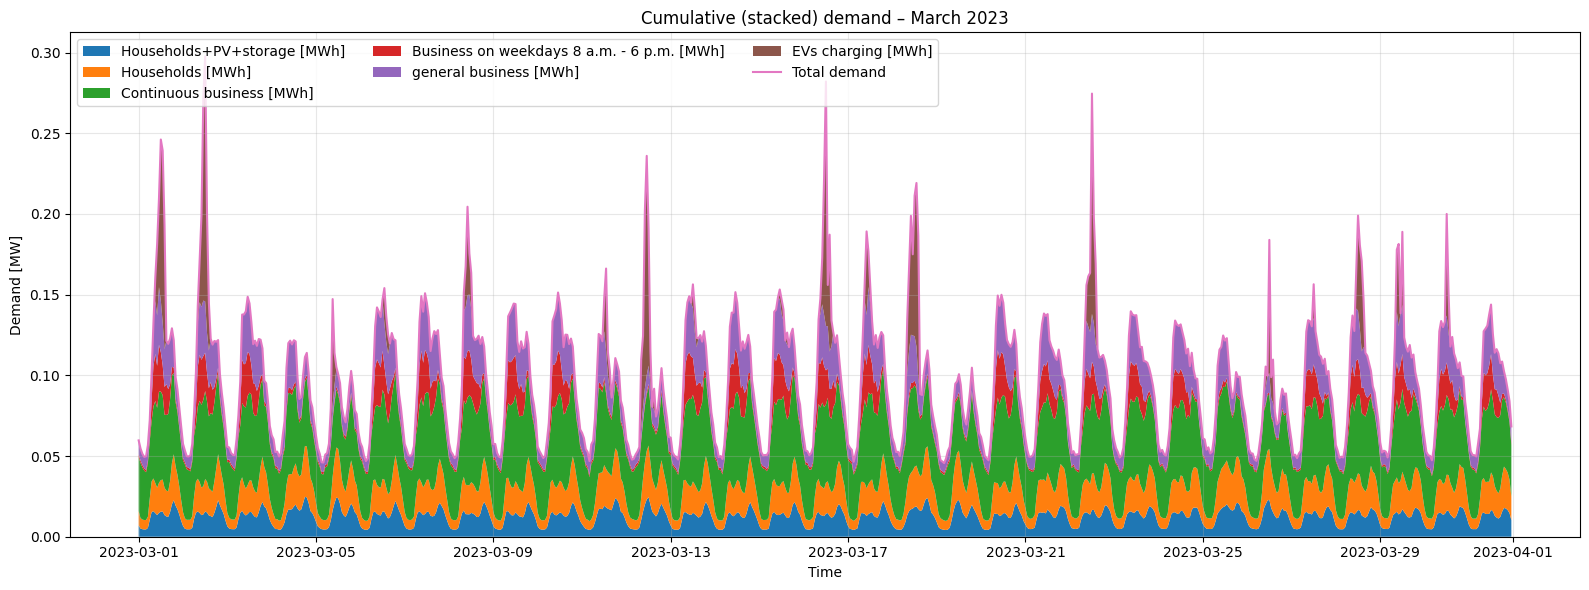

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")


df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"],
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"],
    "Continuous business [MWh]":  tot_flex_load["tot_demand_flex_load_variants_[MWh]"],
    "Business on weekdays 8 a.m. - 6 p.m. [MWh]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"],
    "general business [MWh]":  tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"],
    "EVs charging [MWh]":         Tot_EVs_charging["EVs demand [MWh]"],
}).reindex(snapshots).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index, *(df_Tot_demand[col].values for col in df_Tot_demand.columns), labels=df_Tot_demand.columns)


total = df_Tot_demand.sum(axis=1)
plt.plot(df_Tot_demand.index, total, linewidth=1.5, label="Total demand")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time")
plt.ylabel("Demand [MW]")
plt.legend(loc="upper left", ncol=3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


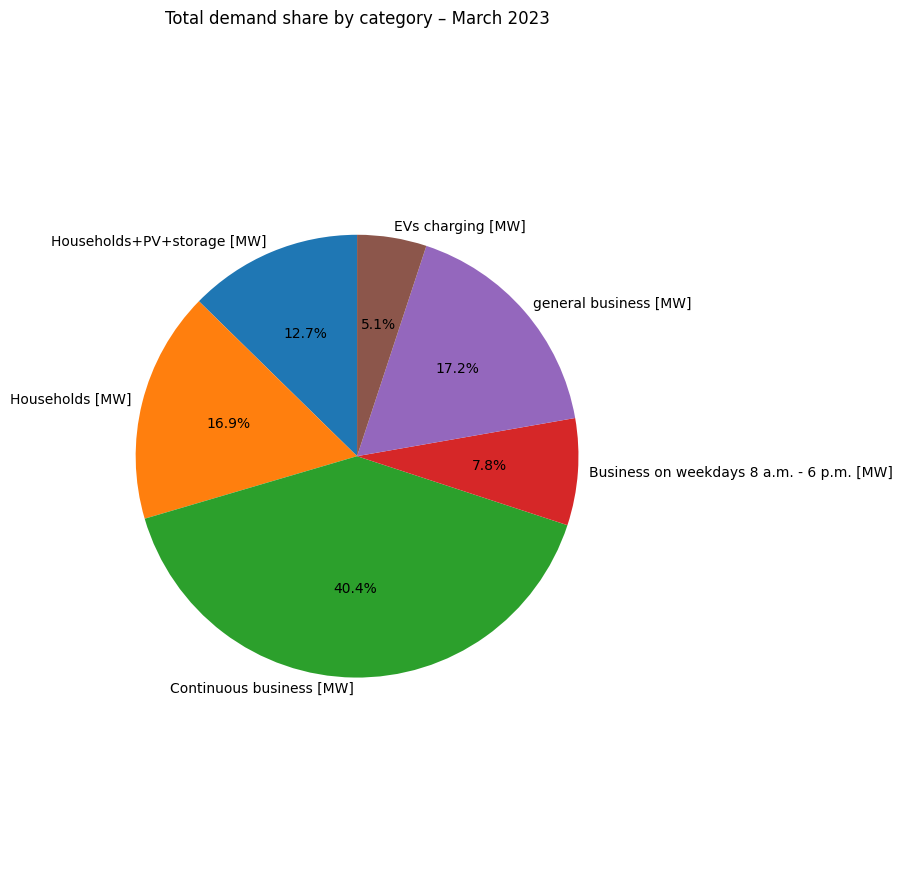

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

snapshots = pd.date_range("2023-03-01 00:00", "2023-03-31 23:00", freq="h")

series_map = {
    "Households+PV+storage [MW]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Households [MW]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Continuous business [MW]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots).fillna(0),
    "Business on weekdays 8 a.m. - 6 p.m. [MW]": tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "general business [MW]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots).fillna(0),
    "EVs charging [MW]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots).fillna(0),
}

totals = pd.Series({k: v.sum() for k, v in series_map.items()})

plt.figure(figsize=(9, 9))
plt.pie(
    totals.values,
    labels=totals.index,
    autopct="%1.1f%%",     # percentages only
    startangle=90,
    pctdistance=0.60,      # move % closer to center
    labeldistance=1.05     # move labels slightly out
)
plt.axis("equal")
plt.title("Total demand share by category – March 2023")
plt.tight_layout()
plt.show()


In [35]:
df_rated_biomass = pd.DataFrame(
    0.06,
    index=snapshots,
    columns=["power[MW]"]
)

df_rated_solar = pd.DataFrame(
    solar_gen["power[W]"].values,
    index=snapshots,
    columns=["power[MW]"]
)


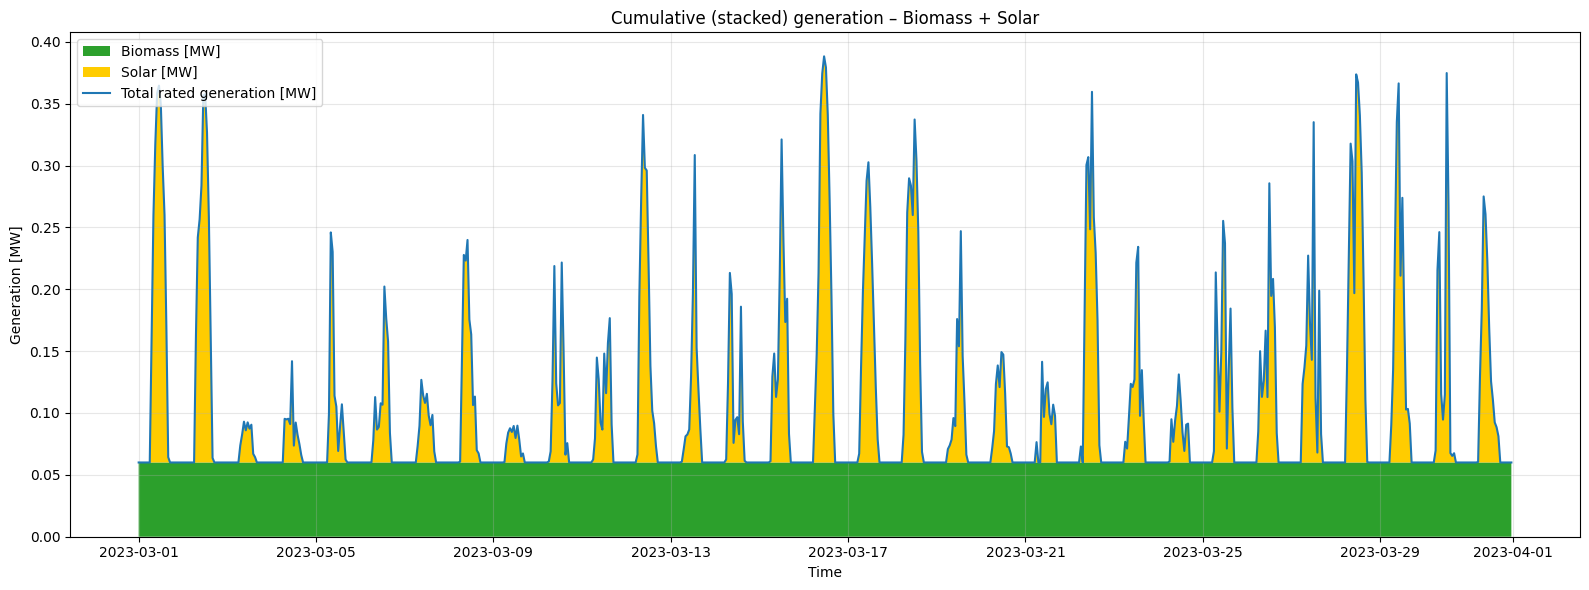

In [36]:
import matplotlib.pyplot as plt
import pandas as pd


df_dispatched_solar = net.generators_t.p["solar"]



df_rated_gen = pd.DataFrame({
    "Biomass [MW]": df_rated_biomass["power[MW]"],
    "Solar [MW]": df_rated_solar["power[MW]"]
})

plt.figure(figsize=(16, 6))
plt.stackplot(
    df_rated_gen.index,
    df_rated_gen["Biomass [MW]"].values,
    df_rated_gen["Solar [MW]"].values,
    labels=["Biomass [MW]", "Solar [MW]"],
    colors=["#2ca02c", "#ffcc00"]
)

total_gen = df_rated_gen.sum(axis=1)
plt.plot(df_rated_gen.index, total_gen, linewidth=1.5, label="Total rated generation [MW]")

plt.title("Cumulative (stacked) generation – Biomass + Solar")
plt.xlabel("Time")
plt.ylabel("Generation [MW]")
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# Discharging for 15 EVs

In [37]:
'''discharging_links = [f"EV{i+1}_discharge" for i in range(15)]
discharging_df = net.links_t.p0[discharging_links].copy()
discharging_df["total_discharging"] = discharging_df.sum(axis=1)
display(charging_df["total_charging"].sum())
display(discharging_df["total_discharging"].sum())'''

'discharging_links = [f"EV{i+1}_discharge" for i in range(15)]\ndischarging_df = net.links_t.p0[discharging_links].copy()\ndischarging_df["total_discharging"] = discharging_df.sum(axis=1)\ndisplay(charging_df["total_charging"].sum())\ndisplay(discharging_df["total_discharging"].sum())'

In [38]:
import matplotlib.pyplot as plt

'''fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(tou_price, color='tab:blue', label="Electricity Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Electricity Price [€/MWh]", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(discharging_df, color='tab:orange', label="Discharging Power")
ax2.set_ylabel("Discharging Power [kW or MW]", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title("Electricity Price and EV Discharging – March")
fig.tight_layout()
plt.grid(True)
plt.show()

#display(discharging_df.sum())
#display(charging_df.sum())'''

'fig, ax1 = plt.subplots(figsize=(12, 5))\n\nax1.plot(tou_price, color=\'tab:blue\', label="Electricity Price")\nax1.set_xlabel("Time")\nax1.set_ylabel("Electricity Price [€/MWh]", color=\'tab:blue\')\nax1.tick_params(axis=\'y\', labelcolor=\'tab:blue\')\n\nax2 = ax1.twinx()\nax2.plot(discharging_df, color=\'tab:orange\', label="Discharging Power")\nax2.set_ylabel("Discharging Power [kW or MW]", color=\'tab:orange\')\nax2.tick_params(axis=\'y\', labelcolor=\'tab:orange\')\n\nplt.title("Electricity Price and EV Discharging – March")\nfig.tight_layout()\nplt.grid(True)\nplt.show()\n\n#display(discharging_df.sum())\n#display(charging_df.sum())'

In [39]:
'''df_ch_dis = pd.DataFrame({
   
    "demand": df_EVs["power_consumption1_kW"]/1000,
    "avai": df_EVs["availability1"],
    #"EV1_char": net.links_t.p0["EV4_charge"],
    #"EV5_dis": net.links_t.p0["EV5_discharge"],
    "EV5_SOC": net.stores_t.e["EV1_store"]
    
    
}, index=net.snapshots)

df_ch_dis.iloc[50:100]'''



'df_ch_dis = pd.DataFrame({\n   \n    "demand": df_EVs["power_consumption1_kW"]/1000,\n    "avai": df_EVs["availability1"],\n    #"EV1_char": net.links_t.p0["EV4_charge"],\n    #"EV5_dis": net.links_t.p0["EV5_discharge"],\n    "EV5_SOC": net.stores_t.e["EV1_store"]\n    \n    \n}, index=net.snapshots)\n\ndf_ch_dis.iloc[50:100]'

In [40]:
#df_EVs["power_consumption1_kW"].sum()+df_EVs["power_consumption2_kW"].sum()+df_EVs["power_consumption3_kW"].sum()+df_EVs["power_consumption4_kW"].sum()+df_EVs["power_consumption5_kW"].sum()


In [41]:
charging_df["total_charging"].sum()+ Charging_df["total_Charging"].sum() + CHarging_df["total_CHarging"].sum()

np.float64(3.71750367339083)

In [42]:
charging_df["total_charging"].loc["2023-03-06 13:00:00"]#+Charging_df["total_Charging"].loc["2023-03-06 13:00:00"]+CHarging_df["total_CHarging"].loc["2023-03-06 13:00:00"]

np.float64(0.0)

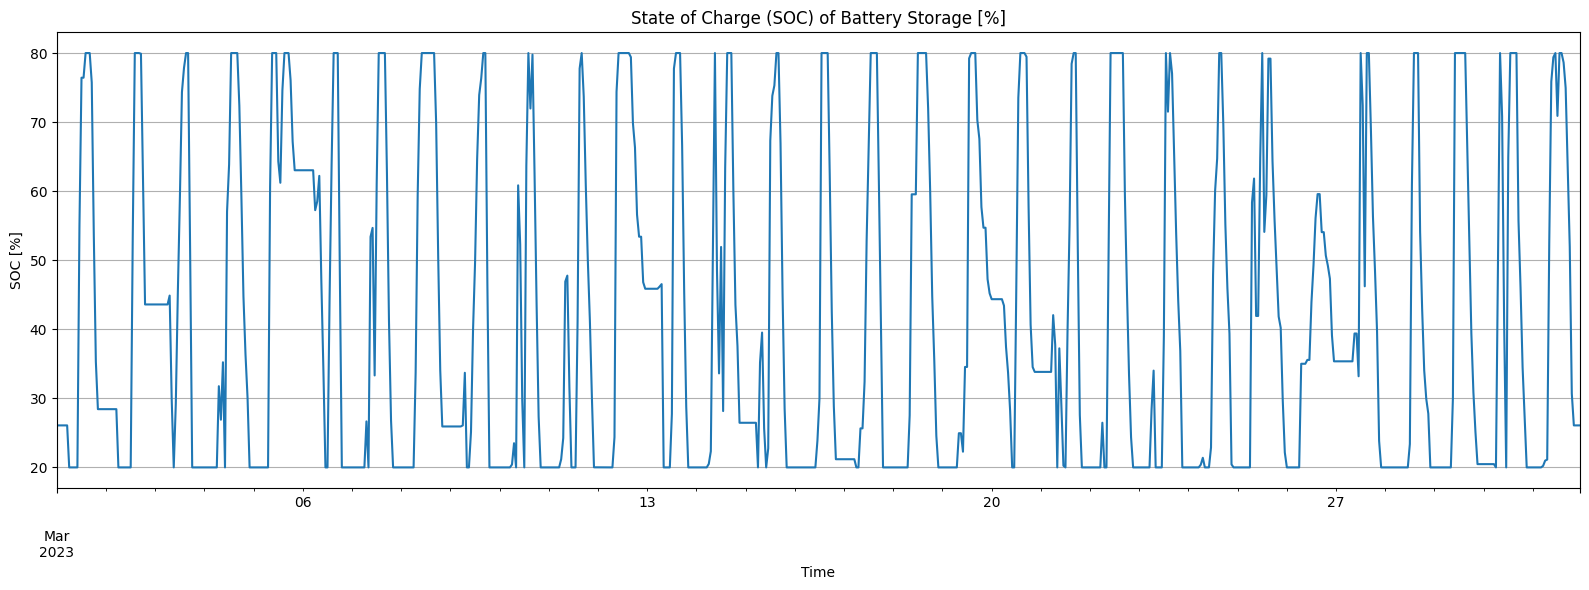

In [43]:
battery_capacity_mwh = net.stores.loc["battery_storage", "e_nom"]

# SOC in percentage
soc_percent = net.stores_t.e["battery_storage"] / battery_capacity_mwh * 100

# Plot
plt.figure(figsize=(16, 6))
soc_percent.plot()
plt.title("State of Charge (SOC) of Battery Storage [%]")
plt.ylabel("SOC [%]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

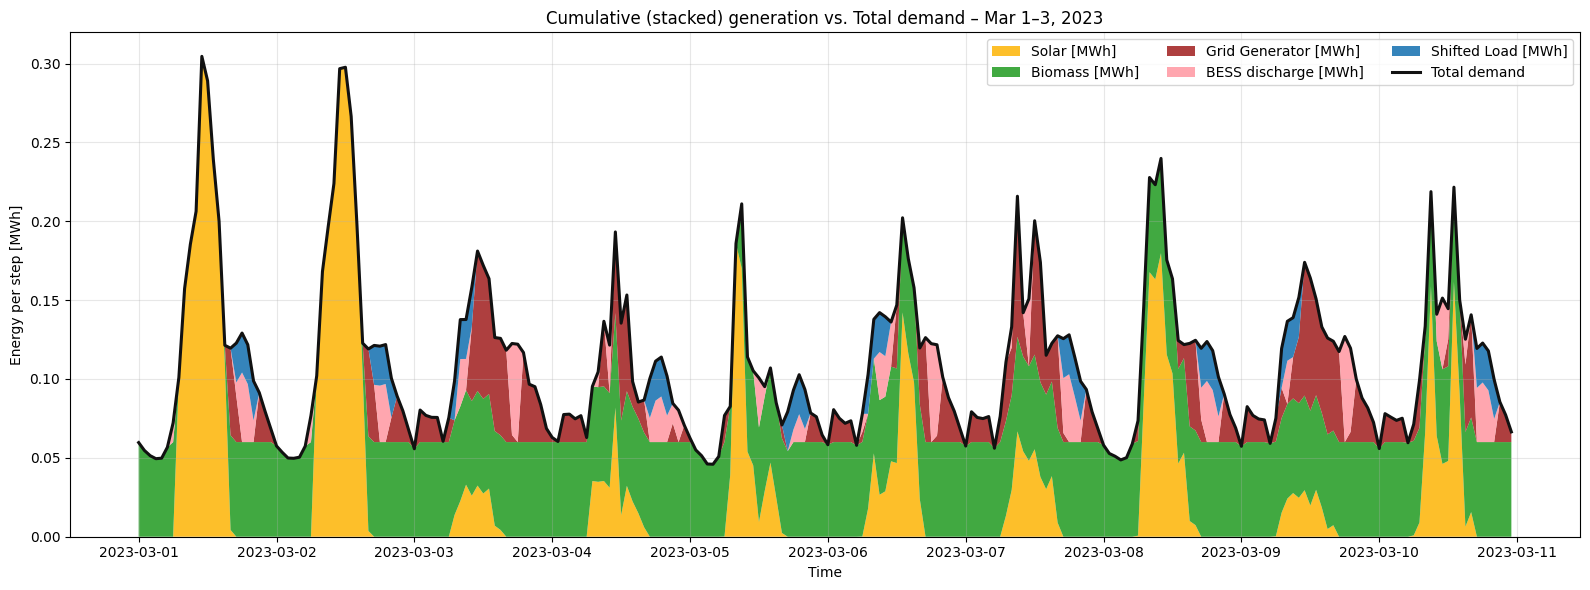

In [44]:
snapshots = pd.date_range("2023-03-01 00:00", "2023-03-10 23:00", freq="h")

solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
#EVs_discharge  = discharging_df["total_discharging"].reindex(snapshots).fillna(0)


store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)          # to generation
batt_charging  = (-store_p).clip(lower=0)  # to demand

Store_p = net.stores_t.p["DSM"].reindex(snapshots).fillna(0).astype(float)
Bess_discharge = Store_p.clip(lower=0)          # to generation
Batt_charging  = (-Store_p).clip(lower=0) 

df_gen_stack = pd.DataFrame({
    "Solar [MWh]":          solar,
    "Biomass [MWh]":        biomass,
    "Grid Generator [MWh]": grid,
    "BESS discharge [MWh]": bess_discharge,
    "Shifted Load [MWh]": Bess_discharge,
    #"V2G [MWh]" : EVs_discharge
}).astype(float)

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    #"Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

total_demand = df_Tot_demand.sum(axis=1)


gen_colors = {
    "Solar [MWh]":          "#FDB813",   # sunny yellow
    "Biomass [MWh]":        "#2CA02C",   # warm orange
    "Grid Generator [MWh]": "#A52A2A",   # green
    "BESS discharge [MWh]": "#FF9DA6",# red
    "Shifted Load [MWh]": "#1f77b4",
    #"V2G [MWh]": "#0000FF",
}
cols = list(df_gen_stack.columns)
plt.figure(figsize=(16,6))
plt.stackplot(
    df_gen_stack.index,
    *(df_gen_stack[c].values for c in cols),
    labels=cols,
    colors=[gen_colors[c] for c in cols],
    alpha=0.9,
)
plt.plot(total_demand.index, total_demand, color="#111111", lw=2.2, label="Total demand")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)


plt.title("Cumulative (stacked) generation vs. Total demand – Mar 1–3, 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper right", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


In [45]:
bess_discharge.sum()

np.float64(1.4783014716326301)

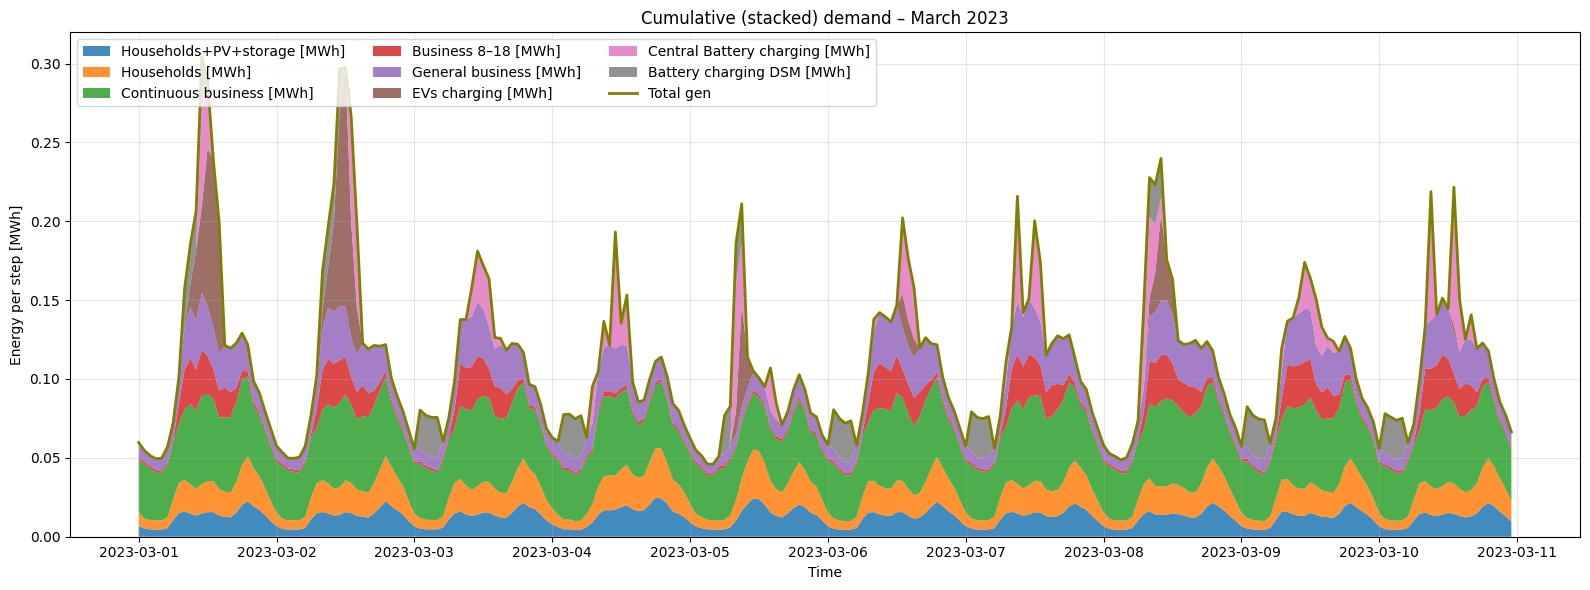

In [46]:


solar   = net.generators_t.p["solar"].reindex(snapshots).fillna(0).astype(float)
biomass = net.generators_t.p["Biomass"].reindex(snapshots).fillna(0).astype(float)
grid    = net.generators_t.p["grid_generator"].reindex(snapshots).fillna(0).astype(float)
#EVs_discharge  = discharging_df["total_discharging"].reindex(snapshots).fillna(0)

store_p = net.stores_t.p["battery_storage"].reindex(snapshots).fillna(0).astype(float)
bess_discharge = store_p.clip(lower=0)
batt_charging  = (-store_p).clip(lower=0)

total_gen = (solar + biomass + grid + bess_discharge+ Bess_discharge).astype(float)
df_total_generation = pd.DataFrame({"Total Generation [MWh]": total_gen})

df_Tot_demand = pd.DataFrame({
    "Households+PV+storage [MWh]": tot_Houshold_pv_storage["tot_demand_Houshold_pv_storage_variants_[MWh]"].reindex(snapshots),
    "Households [MWh]":            tot_Houshold["tot_demand_Houshold_variants_[MWh]"].reindex(snapshots),
    "Continuous business [MWh]":   tot_flex_load["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    #"Continuous business(shifted) [MWh]": df_shifted_load_target["tot_demand_flex_load_variants_[MWh]"].reindex(snapshots),
    "Business 8–18 [MWh]":         tot_Landswirtschaftsbetriebe["tot_demand_Landswirtschaftsbetriebe_variants_[MWh]"].reindex(snapshots),
    "General business [MWh]":      tot_Gewerbe["tot_demand_Gewerbe_variants_[MWh]"].reindex(snapshots),
    "EVs charging [MWh]":          Tot_EVs_charging["EVs demand [MWh]"].reindex(snapshots),
    "Central Battery charging [MWh]":      batt_charging,
    "Battery charging DSM [MWh]":      Batt_charging,
}).fillna(0).astype(float)

plt.figure(figsize=(16, 6))
plt.stackplot(df_Tot_demand.index,
              *(df_Tot_demand[c].values for c in df_Tot_demand.columns),
              labels=df_Tot_demand.columns, alpha=0.85)

plt.plot(df_total_generation.index,
         df_total_generation["Total Generation [MWh]"],
         linewidth=2, label="Total gen", color="olive")

plt.title("Cumulative (stacked) demand – March 2023")
plt.xlabel("Time"); plt.ylabel("Energy per step [MWh]")
plt.legend(loc="upper left", ncol=3); plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


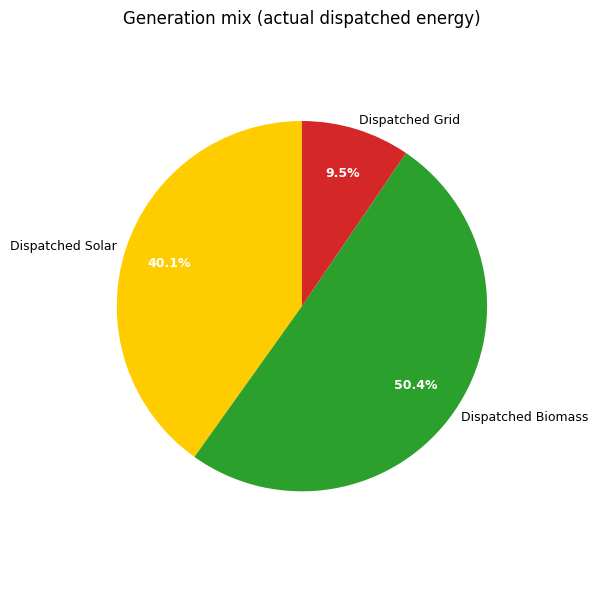

In [47]:
import matplotlib.pyplot as plt

# --- Supply breakdown (totals over the window; 1-hour steps ≈ MWh) ---
right_solar   = net.generators_t.p["solar"].sum()
right_biomass = net.generators_t.p["Biomass"].sum()
right_grid    = net.generators_t.p["grid_generator"].sum()

right_labels = ["Dispatched Solar", "Dispatched Biomass", "Dispatched Grid"]
right_sizes  = [right_solar, right_biomass, right_grid]
right_colors = ["#ffcc00", "#2ca02c", "#d62728"]  # yellow, green, red

# drop zero slices to avoid clutter
labels, sizes, colors = zip(*[(L,S,C) for L,S,C in zip(right_labels, right_sizes, right_colors) if S > 0])

# --- Plot single pie ---
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors,
    autopct="%1.1f%%", startangle=90, pctdistance=0.75, labeldistance=1.05
)
ax.axis("equal")
ax.set_title("Generation mix (actual dispatched energy)")

# styling
for t in autotexts:
    t.set_color("white"); t.set_fontweight("bold"); t.set_fontsize(9)
for t in texts:
    t.set_fontsize(9)

plt.tight_layout()
plt.show()


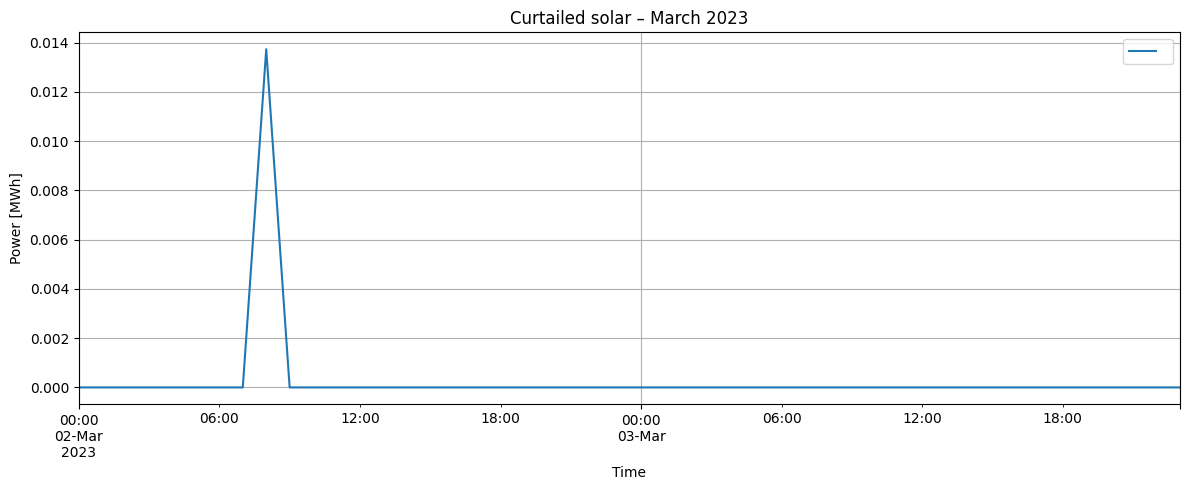

In [48]:
start1= "2023-03-02 00:00:00"
end1 =  "2023-03-03 23:00:00"
solar_Curtailment=(solar_gen["power[W]"]-net.generators_t.p["solar"])

plt.figure(figsize=(12, 5))
solar_Curtailment.loc[start1:end1].plot(legend=True)
plt.title("Curtailed solar – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [MWh]")
plt.grid(True)
plt.tight_layout()
plt.show()

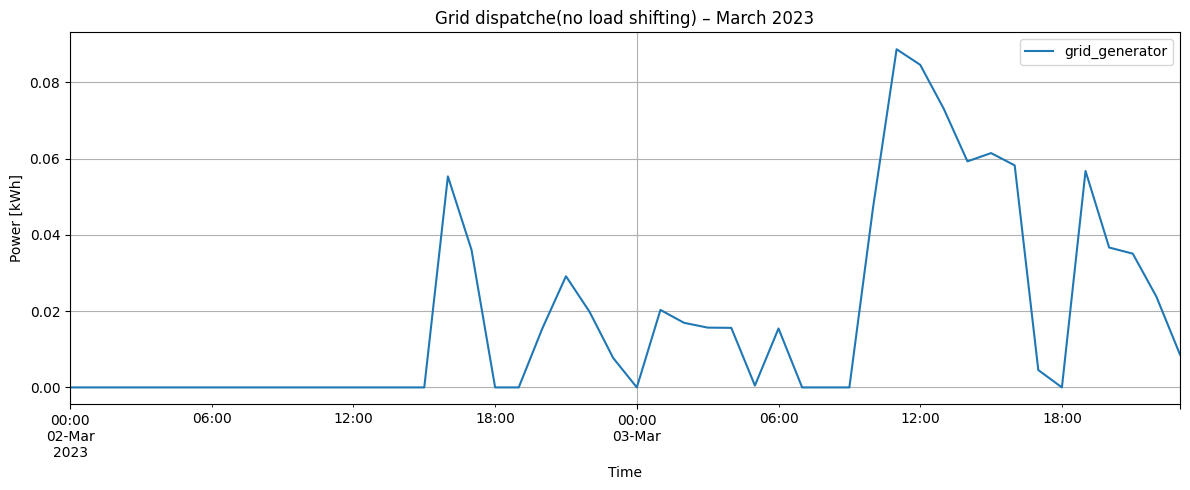

Timestamp('2023-03-07 09:00:00')

In [49]:
plt.figure(figsize=(12, 5))
net.generators_t.p["grid_generator"].loc[start1:end1].plot(legend=True)
plt.title("Grid dispatche(no load shifting) – March 2023")
plt.xlabel("Time")
plt.ylabel("Power [kWh]")
plt.grid(True)
plt.tight_layout()
plt.show()
net.generators_t.p["grid_generator"].idxmax()

<Axes: title={'center': 'total Flex Load'}, xlabel='snapshot'>

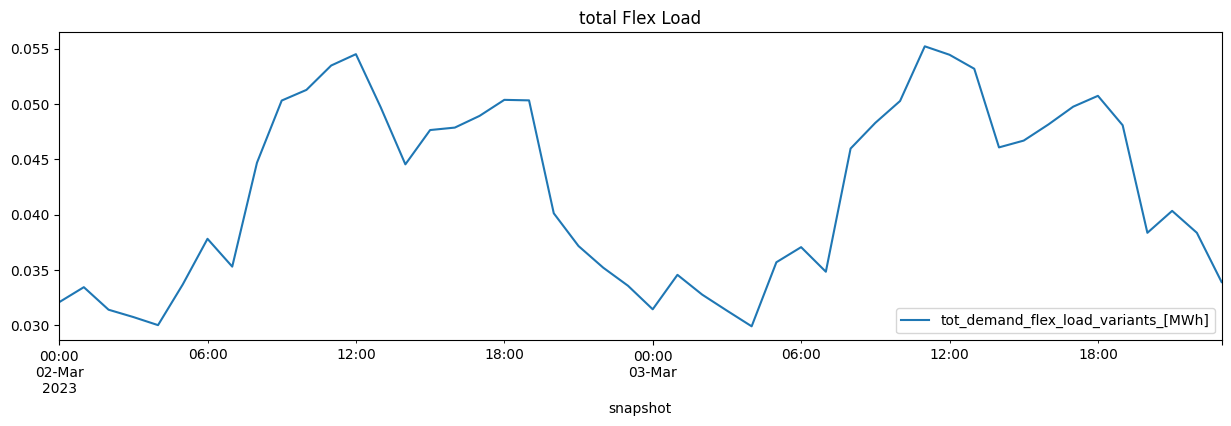

In [50]:
tot_flex_load.loc[start1:end1].plot(figsize=(15, 4), title="total Flex Load")

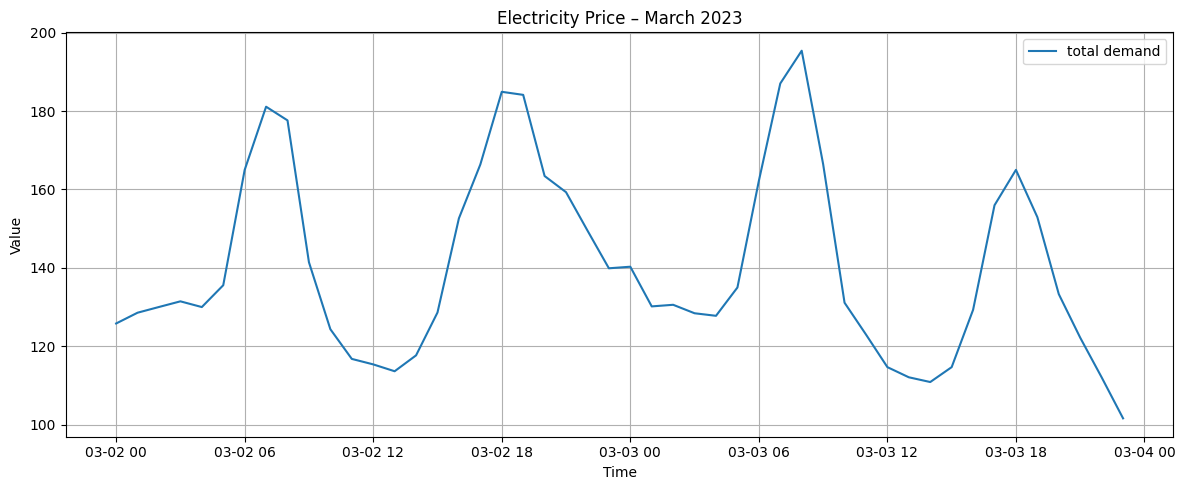

E_price    102.518454
dtype: float64

In [51]:
Tou_price = pd.read_csv("electricity_price_march_2023.csv", header=None, names=["E_price"])
tou_Price = Tou_price[::8].copy()

tou_Price.loc[len(tou_Price)] = 82.19
tou_price = tou_Price.reset_index(drop=True)

tou_price.index = net.snapshots
tou_price.loc[tou_price["E_price"] <= 0, "E_price"] = 0.1
 
plt.figure(figsize=(12, 5))
plt.plot(tou_price.loc[start1:end1],  label="total demand")
plt.title("Electricity Price – March 2023")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#tou_price.max()
tou_price.mean()

<Axes: title={'center': 'total hourly grid import[MW]'}, xlabel='snapshot'>

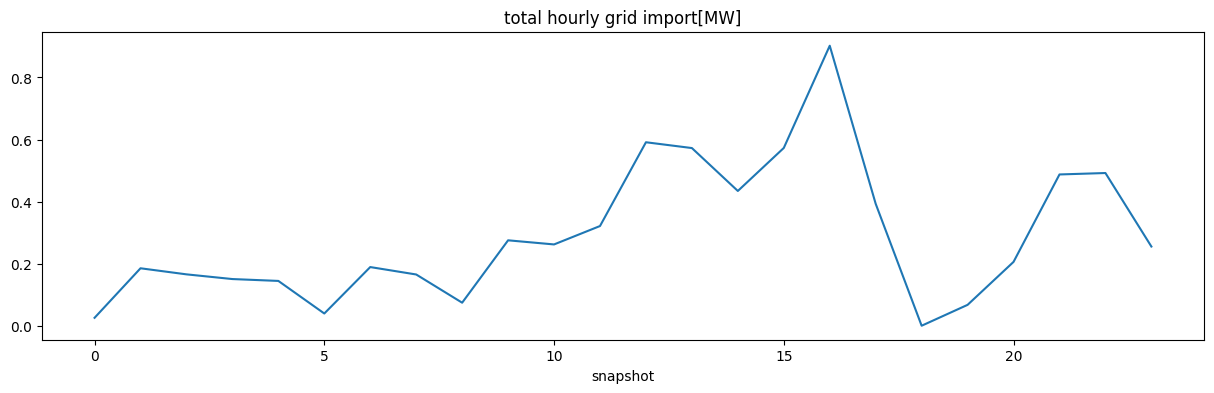

In [52]:
tot_hourly_grid_import= net.generators_t.p["grid_generator"].groupby(net.generators_t.p["grid_generator"].index.hour).sum()
tot_hourly_grid_import.plot(figsize=(15, 4), title="total hourly grid import[MW]")

# Locational Marginal Prices at each buses

In [53]:
start = "2023-03-13 06:00:00"
end = "2023-03-13 22:00:00"
net.buses_t.marginal_price.loc[start:end]

Bus,grid,solar_bus,demand_Gewerbe,houshold,houshold_pv_storage,Landswirtschaftsbetriebe,battery_bus,flex_load,Biomass,tesla_model_3_1_bus,...,vw_id7_3_bus,vw_id7_4_bus,bmw_i4_m50_1_bus,bmw_i4_m50_2_bus,bmw_i4_m50_3_bus,bmw_i4_m50_4_bus,benz_eqe_300_1_bus,benz_eqe_300_2_bus,benz_eqe_300_3_bus,benz_eqe_300_4_bus
snapshot,,,,,,,,,,,,,,,,,,,,,
2023-03-13 06:00:00,38.49,177.71,238.49,238.49,238.49,238.49,177.72,238.49,138.49,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 07:00:00,77.71,177.71,277.71,277.71,277.71,277.71,177.72,277.71,177.71,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 08:00:00,79.81,177.75,277.75,277.75,277.75,277.75,177.72,277.75,177.75,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 09:00:00,42.46,142.46,242.46,242.46,242.46,242.46,142.47,242.46,142.46,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 10:00:00,30.51,130.51,230.51,230.51,230.51,230.51,130.52,230.51,130.51,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 11:00:00,22.32,122.32,222.32,222.32,222.32,222.32,122.33,222.32,122.32,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 12:00:00,2.07,0.05,100.05,100.05,100.05,100.05,0.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 13:00:00,0.10,0.05,100.05,100.05,100.05,100.05,0.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05
2023-03-13 14:00:00,0.10,0.05,100.05,100.05,100.05,100.05,0.06,100.05,0.05,100.05,...,100.05,100.05,0.0,100.05,100.05,100.02,100.05,100.05,100.05,100.05


In [54]:
display(solar_gen["power[W]"].loc["2023-03-13 08:00:00"])
display(net.generators_t.p["solar"].loc["2023-03-13 08:00:00"])
display(net.generators_t.p["Biomass"].loc["2023-03-13 12:00:00"])
display(net.generators_t.p["grid_generator"].loc["2023-03-13 12:00:00"])
display(net.stores_t.p["battery_storage"].loc["2023-03-13 12:00:00"])     #  + discharge to loads
display(Tot_demand.loc["2023-03-13 12:00:00"])
display(net.stores_t.e["battery_storage"].loc["2023-03-13 12:00:00"])  # soc

np.float64(0.021152)

np.float64(0.021152)

np.float64(0.06)

np.float64(0.0)

np.float64(-0.015484962981439965)

np.float64(0.15634303701855737)

np.float64(0.05548496298143997)

# Revenue EVs

In [55]:
revenue_EV = (net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_Charge"])+(net.buses_t.marginal_price["bmw_i4_m50_2_bus"]*net.links_t.p0["bmw_i4_m50_2_CHarge"])
revenue_EV.sum()

np.float64(28.424665603870338)

# Revenue Solar

In [56]:
revenue_solar = net.buses_t.marginal_price["solar_bus"]*net.generators_t.p["solar"]
revenue_solar.sum()

np.float64(1456.4142170102996)

# Revenue Flex Load

In [57]:
revenue_load = net.buses_t.marginal_price["flex_load"]*(tot_flex_load["tot_demand_flex_load_variants_[MWh]"]-net.stores_t.p["DSM"])
revenue_load.sum()

np.float64(6427.516704542632)

# Revenue fixed Load

In [58]:
Revenue_load = net.buses_t.marginal_price["houshold"]*tot_Houshold["tot_demand_Houshold_variants_[MWh]"]
Revenue_load.sum()

np.float64(2944.4221135184625)

# Total system cost

In [59]:
total_cost = float(net.objective)
print(total_cost)

8731.811568640627


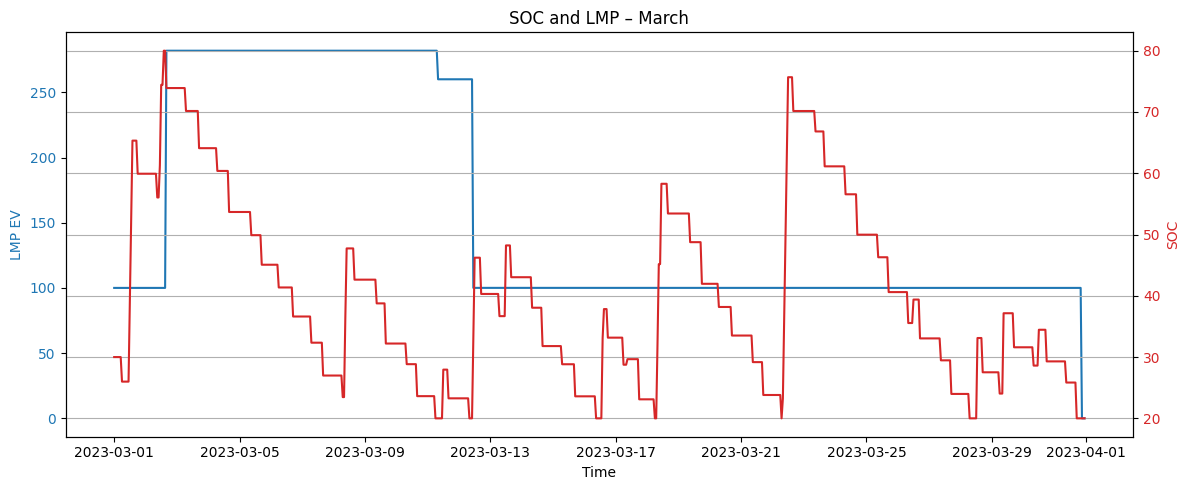

In [60]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))
start = "2023-03-01"
end = "2023-03-31"

# Left Y-axis: LMP Solar
ax1.plot(net.buses_t.marginal_price["bmw_i4_m50_2_bus"].loc[start:end], color='tab:blue', label="LMP Solar")
ax1.set_xlabel("Time")
ax1.set_ylabel("LMP EV", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ev_name = "bmw_i4_m50 (2)"
ev_id = ev_name.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")
store_id = f"{ev_id}_store"

battery_capacity = battery_df.loc[ev_name, "e_nom_MWh"]
soc_percent = (net.stores_t.e[store_id] / battery_capacity) * 100
ax2 = ax1.twinx()
ax2.plot(soc_percent.loc[start:end], color='tab:red', label="Grid Dispatch")
ax2.set_ylabel("SOC", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title("SOC and LMP – March")
fig.tight_layout()
plt.grid(True)
plt.show()

In [61]:
s= net.stores_t.p["bmw_i4_m50_2_store"]
neg = s[s < 0]
neg_times = s.index[s < 0]
neg_times

DatetimeIndex(['2023-03-01 12:00:00', '2023-03-01 13:00:00',
               '2023-03-01 14:00:00', '2023-03-02 11:00:00',
               '2023-03-02 12:00:00', '2023-03-02 14:00:00',
               '2023-03-08 09:00:00', '2023-03-08 10:00:00',
               '2023-03-11 12:00:00', '2023-03-12 11:00:00',
               '2023-03-12 12:00:00', '2023-03-13 12:00:00',
               '2023-03-16 14:00:00', '2023-03-16 15:00:00',
               '2023-03-17 09:00:00', '2023-03-18 08:00:00',
               '2023-03-18 09:00:00', '2023-03-18 11:00:00',
               '2023-03-22 08:00:00', '2023-03-22 09:00:00',
               '2023-03-22 10:00:00', '2023-03-22 11:00:00',
               '2023-03-22 12:00:00', '2023-03-26 12:00:00',
               '2023-03-28 13:00:00', '2023-03-29 09:00:00',
               '2023-03-30 12:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [115]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_buses_links_collapsed(
    net,
    generator_buses=None,
    load_buses=None,
    ev_suffix="_bus",
    ev_supernode="EVs",
    show_edge_labels=False
):
    """
    Buses as nodes, links as edges, EV buses collapsed to one node.
    - Generators on one vertical axis (top→bottom: grid, Biomass, solar_bus, battery_bus).
    - Demands on right, Others in middle, EVs far-right.
    - Node colors: generators=green, demands=orange, EVs=blue, others=gray.
    - Outgoing links from each generator: distinct strong colors; non-generator edges: gray.
    - Node labels are shown above nodes.
    """

    buses = list(net.buses.index)

    if generator_buses is None:
        generator_buses = {"grid", "solar_bus", "Biomass", "battery_bus"}
    if load_buses is None:
        load_buses = {
            "demand_Gewerbe", "houshold", "houshold_pv_storage",
            "Landswirtschaftsbetriebe", "flex_load"
        }

    def is_ev_bus(b):
        return b.endswith(ev_suffix) and (b not in generator_buses) and (b not in load_buses)

    ev_buses = {b for b in buses if is_ev_bus(b)}
    gens_all  = sorted([b for b in buses if b in generator_buses])
    loads     = sorted([b for b in buses if b in load_buses])
    others    = sorted([b for b in buses if (b not in generator_buses) and (b not in load_buses) and (b not in ev_buses)])

    # ---- Build graph, collapse EVs, aggregate parallel links
    G = nx.DiGraph()
    for b in gens_all:  G.add_node(b, kind="generator")
    for b in loads:     G.add_node(b, kind="load")
    for b in others:    G.add_node(b, kind="other")
    if ev_buses:        G.add_node(ev_supernode, kind="ev")

    agg = defaultdict(lambda: {"p_nom": 0.0, "labels": []})
    for name, row in net.links.iterrows():
        u = row["bus0"]; v = row["bus1"]
        if u in ev_buses: u = ev_supernode
        if v in ev_buses: v = ev_supernode
        if u not in G.nodes or v not in G.nodes:
            continue
        key = (u, v, u)
        agg[key]["p_nom"] += float(row.get("p_nom", 0) or 0)
        agg[key]["labels"].append(str(name))
    for (u, v, source), data in agg.items():
        G.add_edge(u, v, p_nom=data["p_nom"], source=source, label=" | ".join(data["labels"]))

    # ---- Positions
    pos = {}
    desired_order = ["grid", "Biomass", "solar_bus", "battery_bus"]
    gen_order = [g for g in desired_order if g in gens_all] + [g for g in gens_all if g not in desired_order]
    y_gen = np.linspace(0, 1, max(len(gen_order), 1))
    for i, b in enumerate(gen_order):
        pos[b] = (0.0, float(y_gen[i]))

    y_o = np.linspace(0, 1, max(len(others), 1))
    for i, b in enumerate(others):
        pos[b] = (0.5, float(y_o[i]))

    y_l = np.linspace(0, 1, max(len(loads), 1))
    for i, b in enumerate(loads):
        pos[b] = (1.0, float(y_l[i]))
        pos["houshold"]  = (1.0, 0.5)   # higher
        pos["flex_load"] = (1.0, 0.75)   # just below

    if ev_buses:
        pos[ev_supernode] = (1.3, 0.5)

    # ---- Draw
    plt.figure(figsize=(14, 8))

    groups = {
        "generator": {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="generator"],
                      "color":"green",   "size":900, "shape":"s", "label":"Generators"},
        "other":     {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="other"],
                      "color":"gray",    "size":700, "shape":"o", "label":"Other"},
        "load":      {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="load"],
                      "color":"orange",  "size":900, "shape":"o", "label":"Demands"},
        "ev":        {"nodes":[n for n,d in G.nodes(data=True) if d["kind"]=="ev"],
                      "color":"blue",    "size":900, "shape":"^", "label":"EVs (collapsed)"},
    }

    handles_nodes, labels_nodes = [], []
    for _, cfg in groups.items():
        nodes = cfg["nodes"]
        if not nodes: 
            continue
        nx.draw_networkx_nodes(
            G, pos, nodelist=nodes,
            node_color=cfg["color"], node_size=cfg["size"],
            node_shape=cfg["shape"], edgecolors="black", linewidths=0.7
        )
        h = plt.Line2D([0],[0], marker=cfg["shape"], linestyle="", color=cfg["color"],
                       markeredgecolor="black", markersize=14)
        handles_nodes.append(h); labels_nodes.append(cfg["label"])

    # Edge colors
    strong_colors = ["red", "blue", "purple", "brown", "magenta", "cyan", "black", "gold", "darkorange"]
    gen_sources = [g for g in gen_order if g in G and G.out_degree(g) > 0]
    gen_edge_colors = {s: strong_colors[i % len(strong_colors)] for i, s in enumerate(gen_sources)}
    non_gen_edge_color = "lightgray"

    for u, v, d in G.edges(data=True):
        if d["source"] in gen_edge_colors:
            ecolor = gen_edge_colors[d["source"]]
        else:
            ecolor = non_gen_edge_color
        width = 1.0 + 1.5*np.log10(1 + d.get("p_nom", 0)*10)
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            edge_color=ecolor, width=width,
            arrows=True, arrowstyle="->", arrowsize=15,
            connectionstyle="arc3,rad=0.05"
        )

    # Labels above nodes
    offset = 0.06
    pos_labels = {n: (x, y + offset) for n, (x, y) in pos.items()}
    # Custom labels mapping
    custom_labels = {
    "grid": "Grid",
    "solar_bus": "Solar PV",
    "battery_bus": "Battery",
    "Biomass": "Biomass Plant",
    "houshold": "Household",
    "houshold_pv_storage": "PV + Storage House",
    "demand_Gewerbe": "General trade/business/commerce",
    "Landswirtschaftsbetriebe": "Business on weekdays 8 a.m. - 6 p.m",
    "flex_load": "Industrial flexible Load",
    "EVs": "Electric Vehicles"
    }

    nx.draw_networkx_labels(
    G, pos_labels, labels=custom_labels,
    font_size=13, font_weight="normal"
    )


    if show_edge_labels:
        edge_labels = {(u, v): d.get("label","") for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    ax = plt.gca()
    ax.legend(handles_nodes, labels_nodes, title="Nodes",
              loc="upper right", bbox_to_anchor=(1.28, 1.02),
              frameon=True, fontsize=14, title_fontsize=14)

    plt.title("System Visualization")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


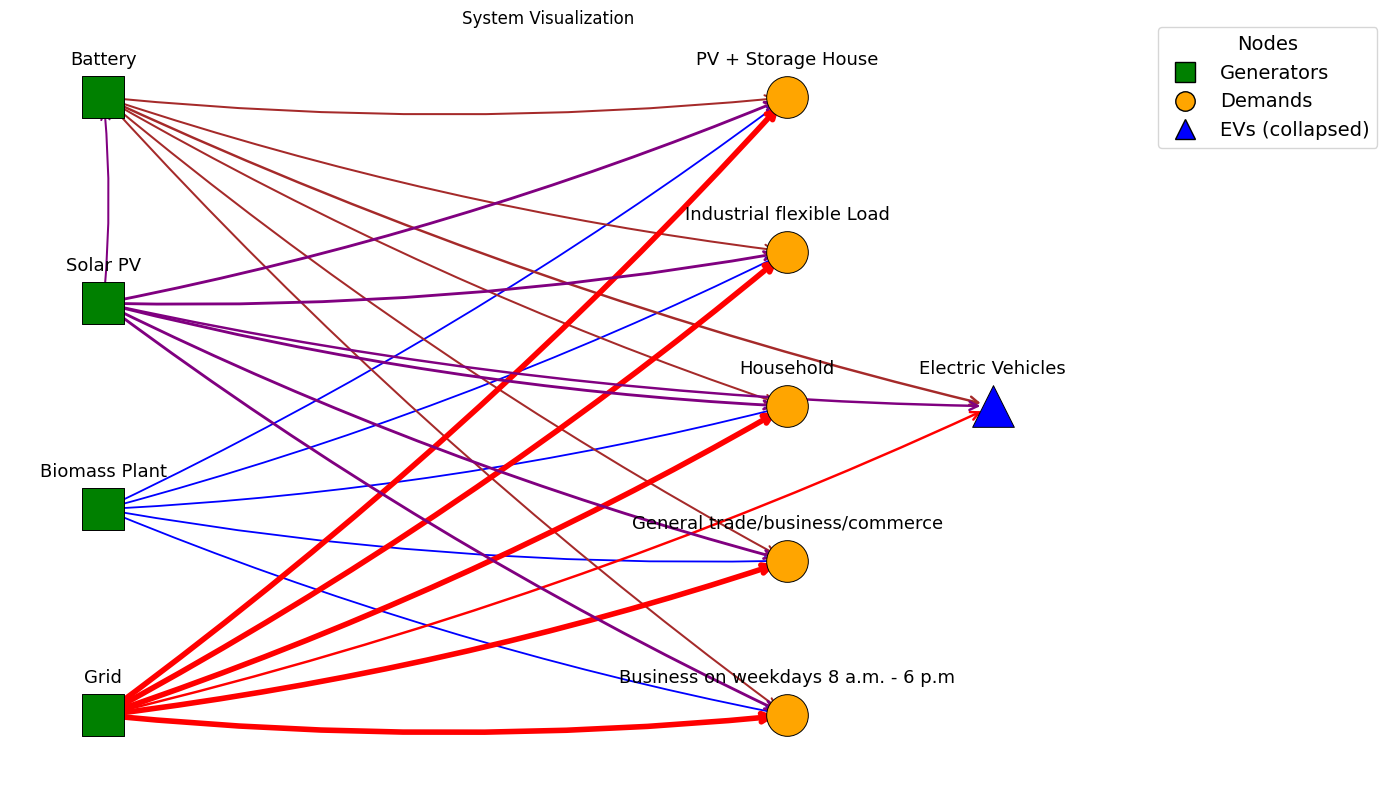

In [116]:
plot_buses_links_collapsed(net)
